In [ ]:
!pip install kagglehub datasets pandas numpy tqdm seaborn scikit-learn
!pip install plotly



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install --upgrade nbformat
!pip install plotly ipywidgets


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import kagglehub
from datasets import load_dataset
import os
from typing import Dict, List, Set, Tuple
from tqdm.notebook import tqdm
import csv
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import pairwise_distances


In [5]:
spotify_tracks = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

In [6]:
playlist_dir = kagglehub.dataset_download("andrewmvd/spotify-playlists")
playlist_file = None
for root, dirs, files in os.walk(playlist_dir):
    for file in files:
        if file.endswith('.csv'):
            playlist_file = os.path.join(root, file)
            break
playlists_df = pd.read_csv(
    playlist_file,
    names=['user_id', 'artistname', 'trackname', 'playlistname'],
    skiprows=1,
    quoting=csv.QUOTE_ALL,
    escapechar='\\',
    on_bad_lines='skip'
)

In [7]:
spotify_tracks.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [63]:
playlists_df.head(15)

user_id                        artistname  \
0   9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1   9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2   9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3   9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4   9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
5   9cc0cfd4d7d7885102480dd99e7a90d6                            Lissie   
6   9cc0cfd4d7d7885102480dd99e7a90d6                    Paul McCartney   
7   9cc0cfd4d7d7885102480dd99e7a90d6                          Joe Echo   
8   9cc0cfd4d7d7885102480dd99e7a90d6                    Paul McCartney   
9   9cc0cfd4d7d7885102480dd99e7a90d6                            Lissie   
10  9cc0cfd4d7d7885102480dd99e7a90d6                      The Breakers   
11  9cc0cfd4d7d7885102480dd99e7a90d6                    Paul McCartney   
12  9cc0cfd4d7d7885102480dd99e7a90d6                       The Coronas   
13  9cc0cfd4d7d7885102480dd99e7a90d6                     Crowded House   
14  9cc0cfd4d7d7885102480dd99e7a90d6                            Lissie   

                                            trackname    playlistname  \
0                (The Angels Wanna Wear My) Red Shoes  HARD ROCK 2010   
1   (What's So Funny 'Bout) Peace, Love And Unders...  HARD ROCK 2010   
2                                    7 Years Too Late  HARD ROCK 2010   
3                               Accidents Will Happen  HARD ROCK 2010   
4                                              Alison  HARD ROCK 2010   
5                                         All Be Okay  HARD ROCK 2010   
6                                     Band On The Run  HARD ROCK 2010   
7                                           Beautiful  HARD ROCK 2010   
8   Blackbird - Live at CitiField, NYC - Digital A...  HARD ROCK 2010   
9                                         Bright Side  HARD ROCK 2010   
10                                    Dance The Go-Go  HARD ROCK 2010   
11                                      Dance Tonight  HARD ROCK 2010   
12                                      Decision Time  HARD ROCK 2010   
13                              Don't Dream It's Over  HARD ROCK 2010   
14                                    Everywhere I Go  HARD ROCK 2010   

                                          track_clean  \
0                (the angels wanna wear my) red shoes   
1   (what's so funny 'bout) peace, love and unders...   
2                                    7 years too late   
3                               accidents will happen   
4                                              alison   
5                                         all be okay   
6                                     band on the run   
7                                           beautiful   
8   blackbird - live at citifield, nyc - digital a...   
9                                         bright side   
10                                    dance the go-go   
11                                      dance tonight   
12                                      decision time   
13                              don't dream it's over   
14                                    everywhere i go   

                        artist_clean  
0                     elvis costello  
1   elvis costello & the attractions  
2                       tiffany page  
3   elvis costello & the attractions  
4                     elvis costello  
5                             lissie  
6                     paul mccartney  
7                           joe echo  
8                     paul mccartney  
9                             lissie  
10                      the breakers  
11                    paul mccartney  
12                       the coronas  
13                     crowded house  
14                            lissie

# How are genres represented?

In [8]:
spotify_tracks['track_genre'].nunique()


114

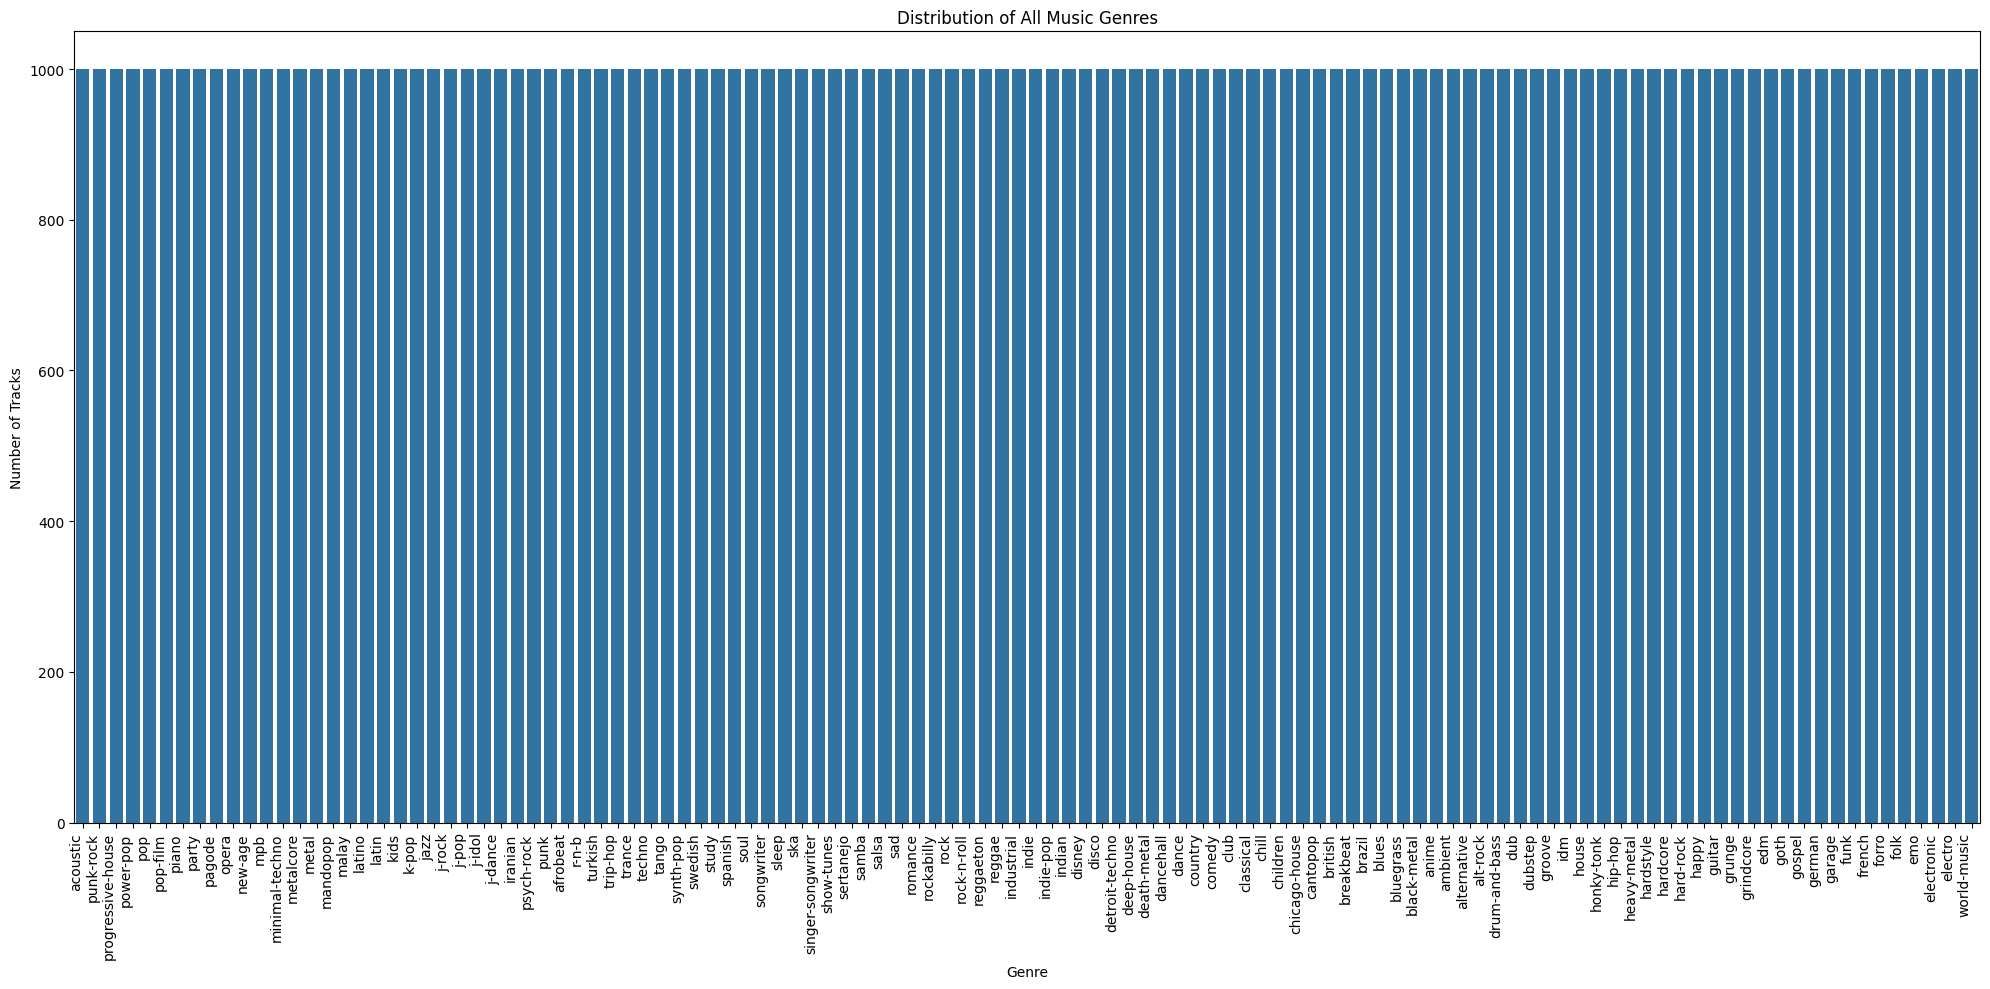

In [9]:
# Genre Distribution Bar Plot
plt.figure(figsize=(20, 10))  # Increased figure size to accommodate all genres
genre_counts = spotify_tracks['track_genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90, ha='right')  # Rotated labels 90 degrees for better readability
plt.title('Distribution of All Music Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()


## PCA

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/2513168174.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


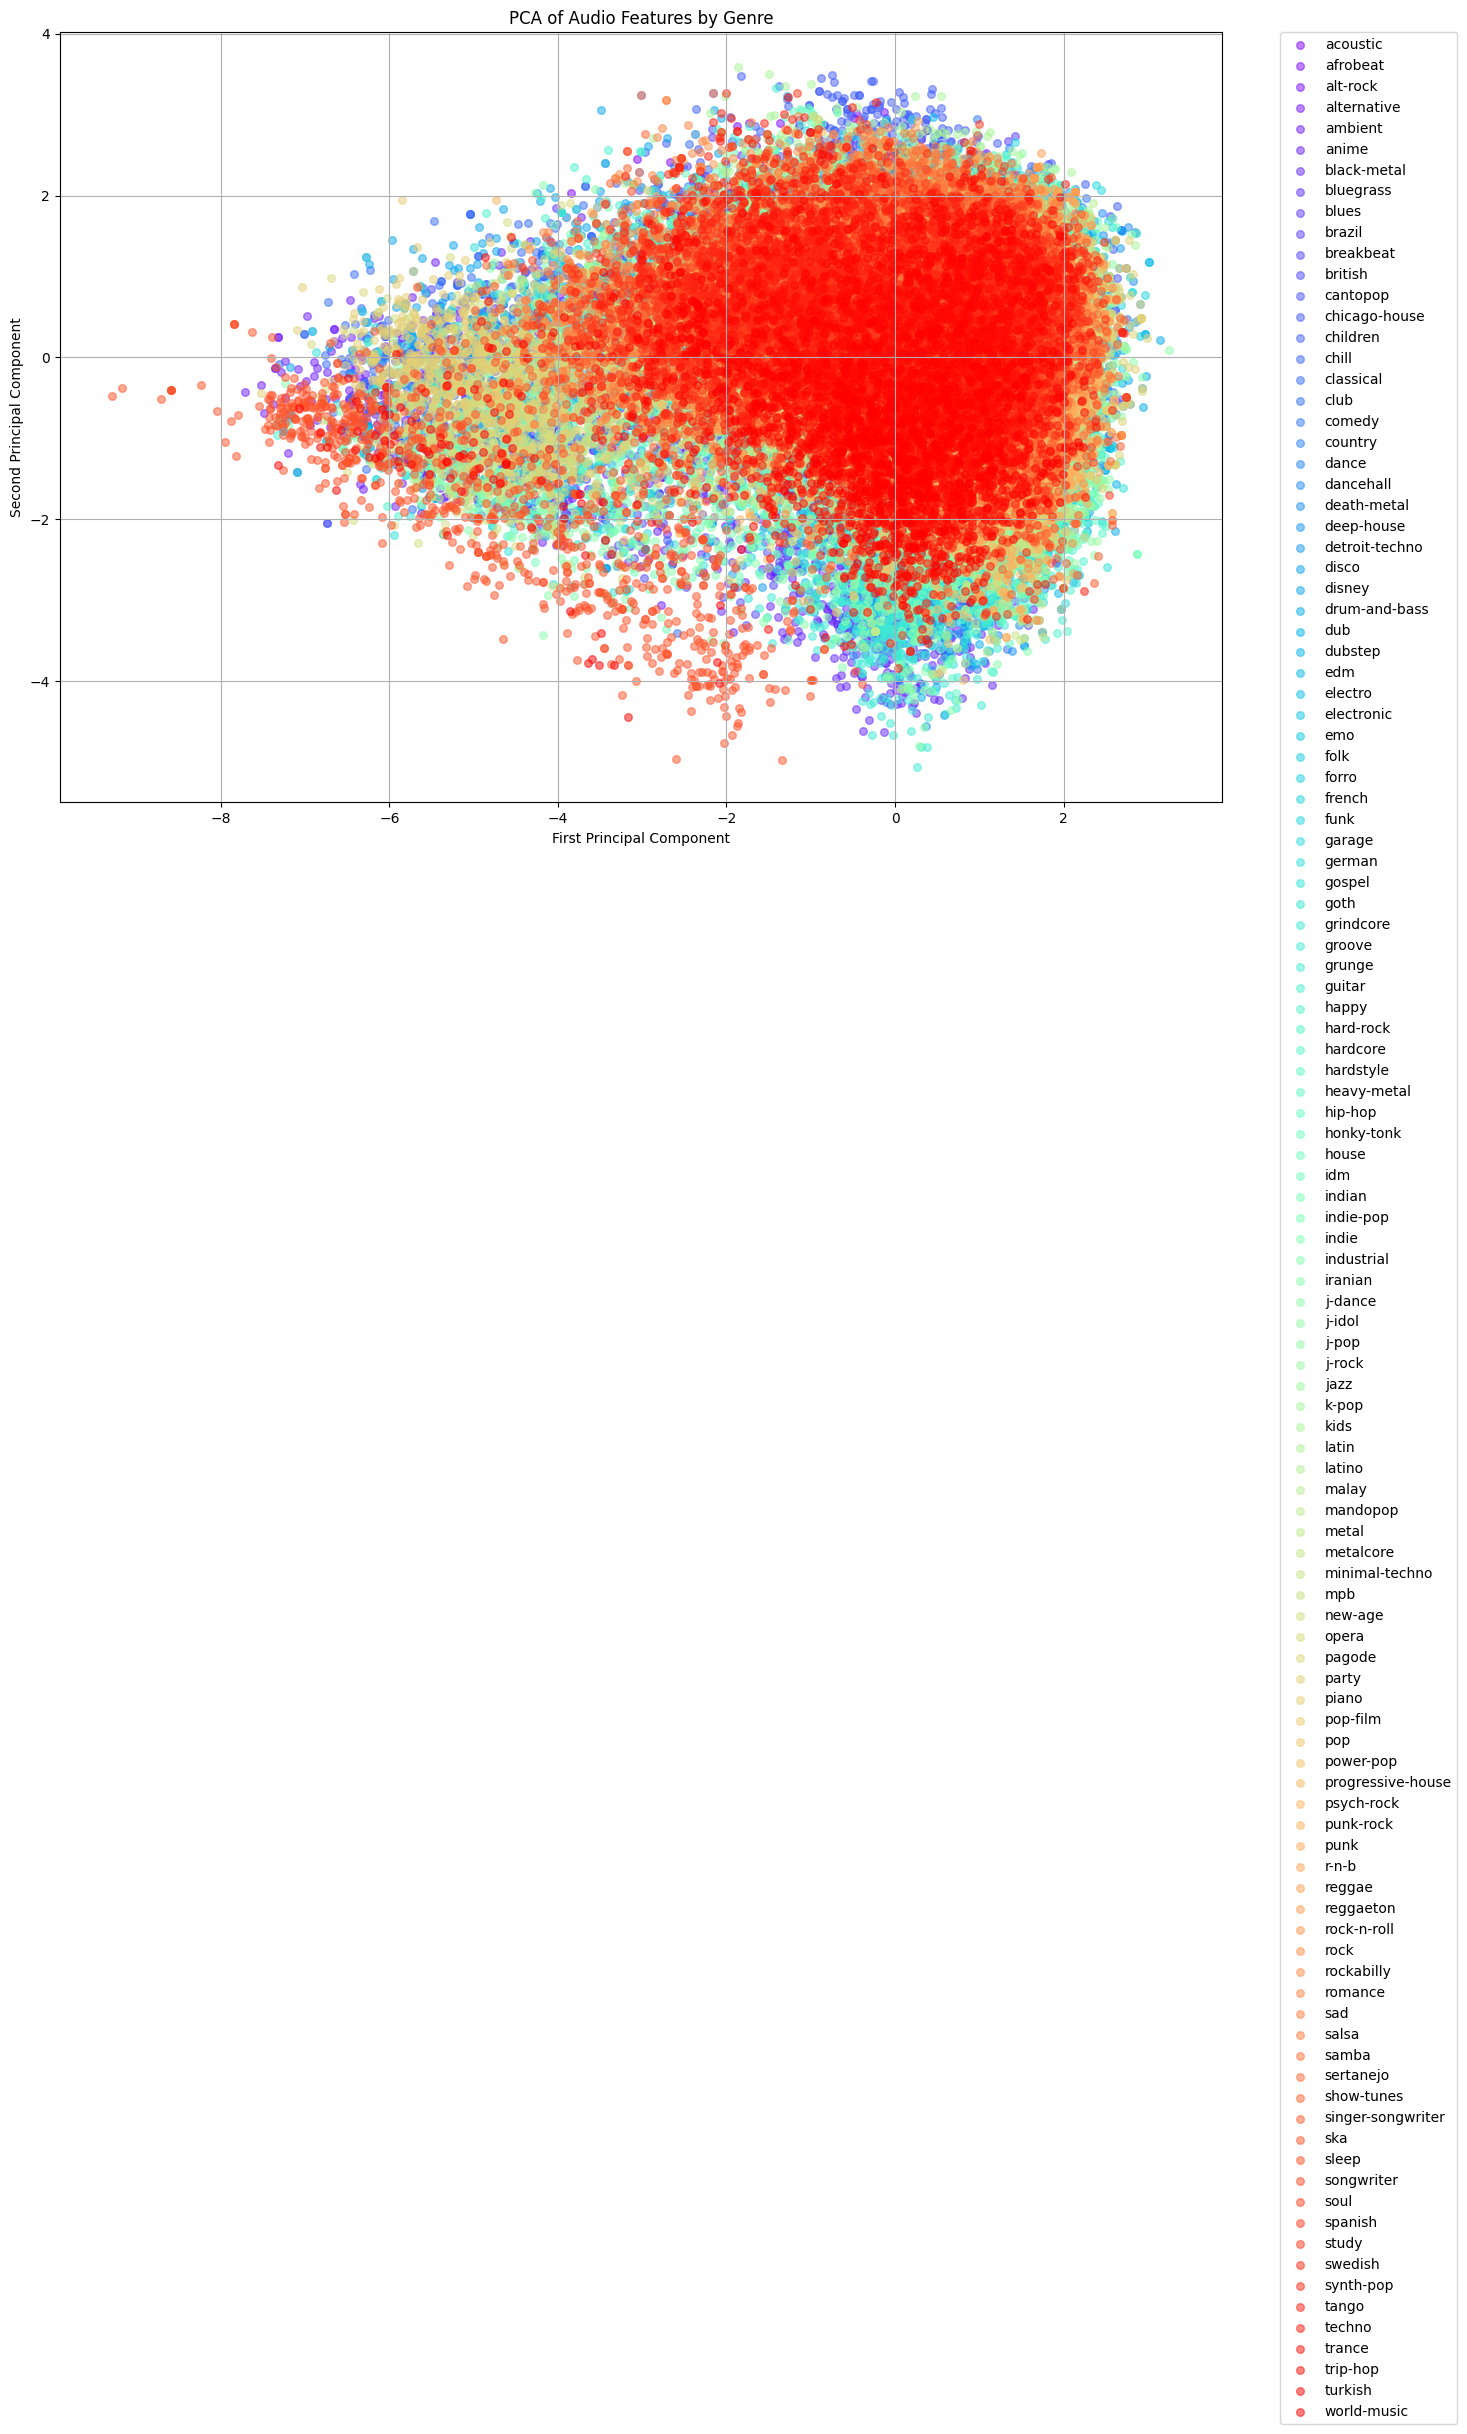


Explained variance ratio:
PC1: 0.319
PC2: 0.159
Total: 0.478

Feature contributions to principal components:
                       PC1       PC2
danceability      0.246124  0.574753
energy            0.509169 -0.276668
loudness          0.516955 -0.078893
speechiness       0.100642  0.026979
acousticness     -0.439340  0.296189
instrumentalness -0.282407 -0.305671
liveness          0.085137 -0.232589
valence           0.295023  0.522034
tempo             0.189046 -0.279969

Total number of unique genres: 114

Top 10 genres by number of tracks:
track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
Name: count, dtype: int64


In [10]:
# PCA Analysis
scaler = StandardScaler()
features = ['danceability', 'energy', 'loudness', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = spotify_tracks[features]
X_scaled = scaler.fit_transform(X)

# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Genre'] = spotify_tracks['track_genre']

# Plot PCA results with all genres
plt.figure(figsize=(15, 10))
# Create a color palette for all unique genres
unique_genres = spotify_tracks['track_genre'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_genres)))

for genre, color in zip(unique_genres, colors):
    mask = pca_df['Genre'] == genre
    plt.scatter(pca_df.loc[mask, 'PC1'], 
               pca_df.loc[mask, 'PC2'], 
               label=genre, 
               color=color,
               alpha=0.5,
               s=30)  # Reduced point size for better visibility

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Audio Features by Genre')
# Move legend outside of plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print explained variance ratio
print("\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total: {sum(pca.explained_variance_ratio_):.3f}")

# Feature contributions
feature_weights = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print("\nFeature contributions to principal components:")
print(feature_weights)

# Additional information about genres
print("\nTotal number of unique genres:", len(unique_genres))
print("\nTop 10 genres by number of tracks:")
print(genre_counts.head(10))

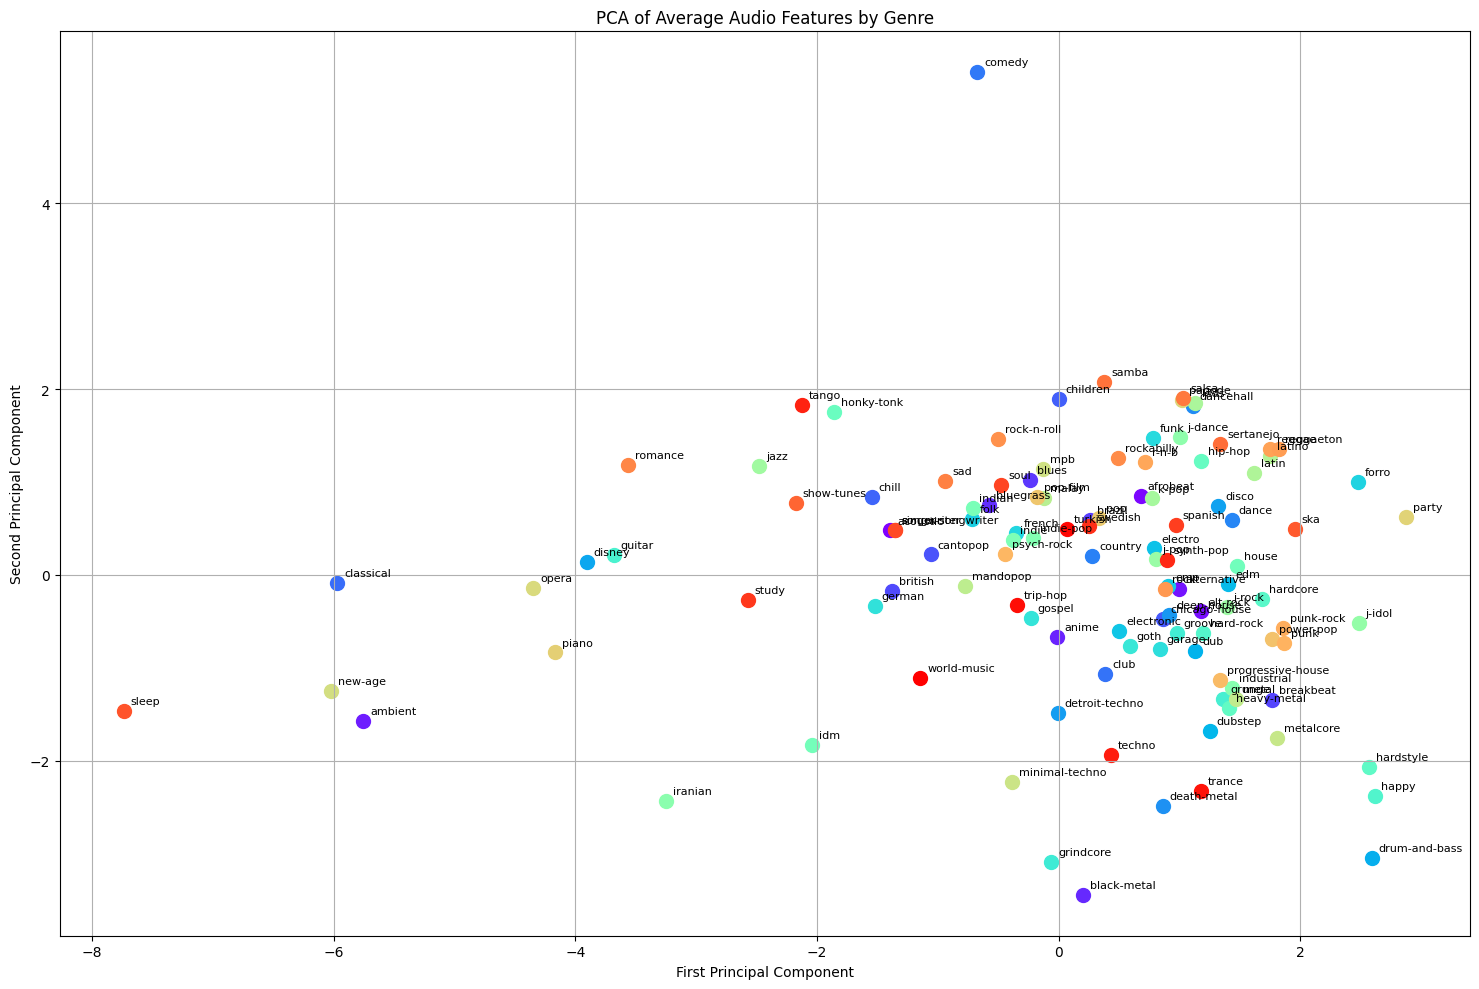


Explained variance ratio (centroids):
PC1: 0.416
PC2: 0.195
Total: 0.611

Feature contributions to principal components:
                       PC1       PC2
danceability      0.262718  0.360741
energy            0.460167 -0.230441
loudness          0.497148 -0.011120
speechiness       0.057590  0.283648
acousticness     -0.420820  0.354560
instrumentalness -0.274356 -0.443120
liveness          0.068409  0.180033
valence           0.256919  0.530897
tempo             0.381713 -0.315992

Most influential features:

PC1 top features:
loudness            0.497148
energy              0.460167
tempo               0.381713
danceability        0.262718
valence             0.256919
liveness            0.068409
speechiness         0.057590
instrumentalness   -0.274356
acousticness       -0.420820
Name: PC1, dtype: float64

PC2 top features:
valence             0.530897
danceability        0.360741
acousticness        0.354560
speechiness         0.283648
liveness            0.180033
loudness  

In [11]:
# Calculate the mean features for each genre
genre_centroids = spotify_tracks.groupby('track_genre')[features].mean()

# Standardize the centroids
X_centroids = scaler.fit_transform(genre_centroids)

# Perform PCA on the centroids
pca_centroids = PCA(n_components=2)
X_pca_centroids = pca_centroids.fit_transform(X_centroids)

# Create DataFrame for plotting
pca_centroids_df = pd.DataFrame(data=X_pca_centroids, columns=['PC1', 'PC2'])
pca_centroids_df['Genre'] = genre_centroids.index

# Plot PCA results for genre centroids
plt.figure(figsize=(15, 10))
# Create a color palette for all genres
colors = plt.cm.rainbow(np.linspace(0, 1, len(genre_centroids.index)))

# Create scatter plot with genre names as annotations
for i, (genre, color) in enumerate(zip(genre_centroids.index, colors)):
    plt.scatter(X_pca_centroids[i, 0], 
               X_pca_centroids[i, 1], 
               color=color,
               s=100)  # Increased point size for better visibility
    # Add genre name as text annotation
    plt.annotate(genre, 
                (X_pca_centroids[i, 0], X_pca_centroids[i, 1]),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Average Audio Features by Genre')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print explained variance ratio for centroids
print("\nExplained variance ratio (centroids):")
print(f"PC1: {pca_centroids.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca_centroids.explained_variance_ratio_[1]:.3f}")
print(f"Total: {sum(pca_centroids.explained_variance_ratio_):.3f}")

# Feature contributions for centroids
feature_weights_centroids = pd.DataFrame(
    pca_centroids.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print("\nFeature contributions to principal components:")
print(feature_weights_centroids)

# Let's also print the features that contribute most to each principal component
print("\nMost influential features:")
print("\nPC1 top features:")
print(feature_weights_centroids['PC1'].sort_values(ascending=False))
print("\nPC2 top features:")
print(feature_weights_centroids['PC2'].sort_values(ascending=False))

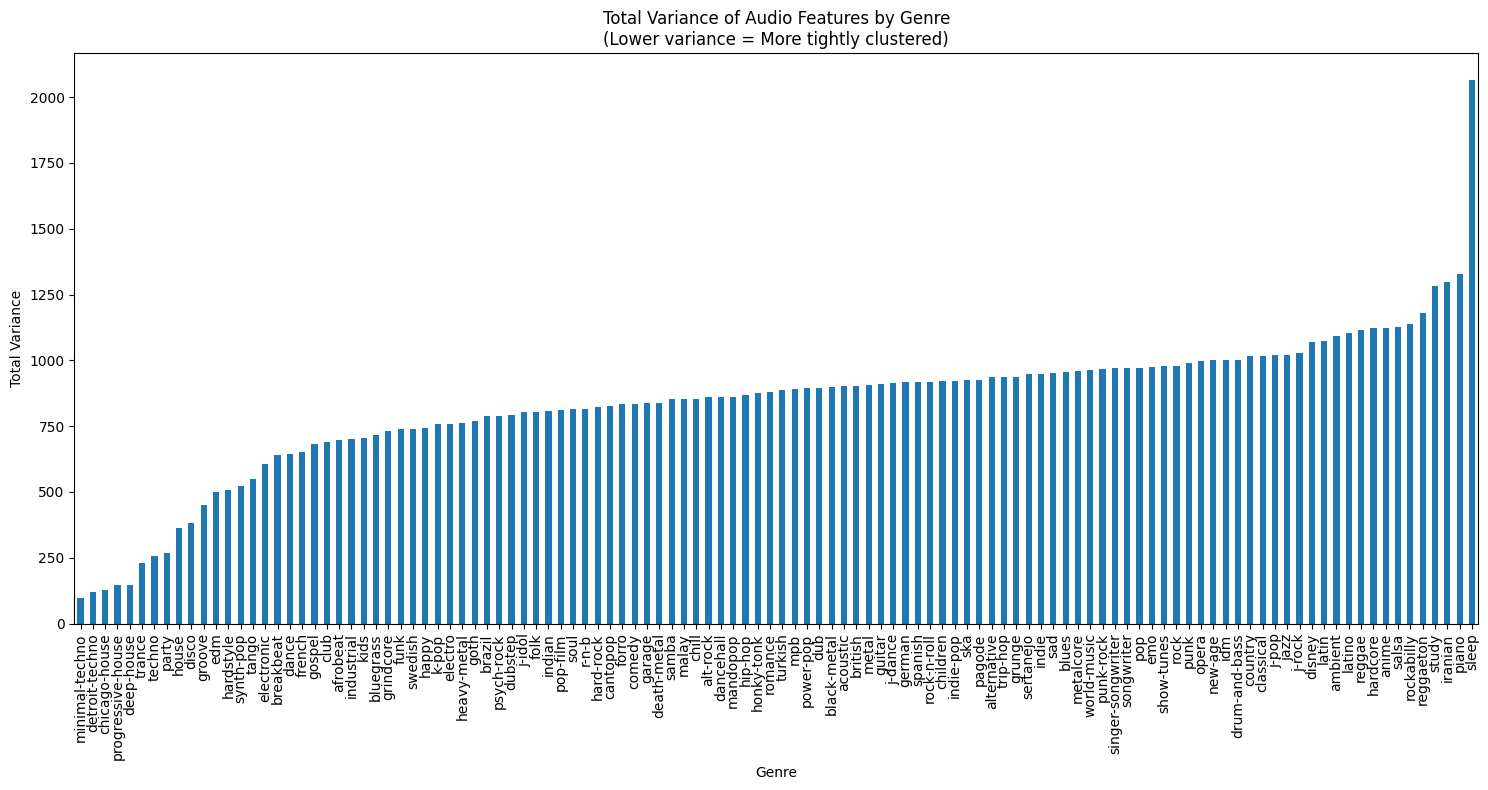


Most consistently clustered genres (lowest variance):
track_genre
minimal-techno        98.803041
detroit-techno       119.471702
chicago-house        129.388950
progressive-house    145.427269
deep-house           148.323772
dtype: float64

Least consistently clustered genres (highest variance):
track_genre
reggaeton    1178.534686
study        1280.580575
iranian      1299.148078
piano        1328.192651
sleep        2063.867853
dtype: float64


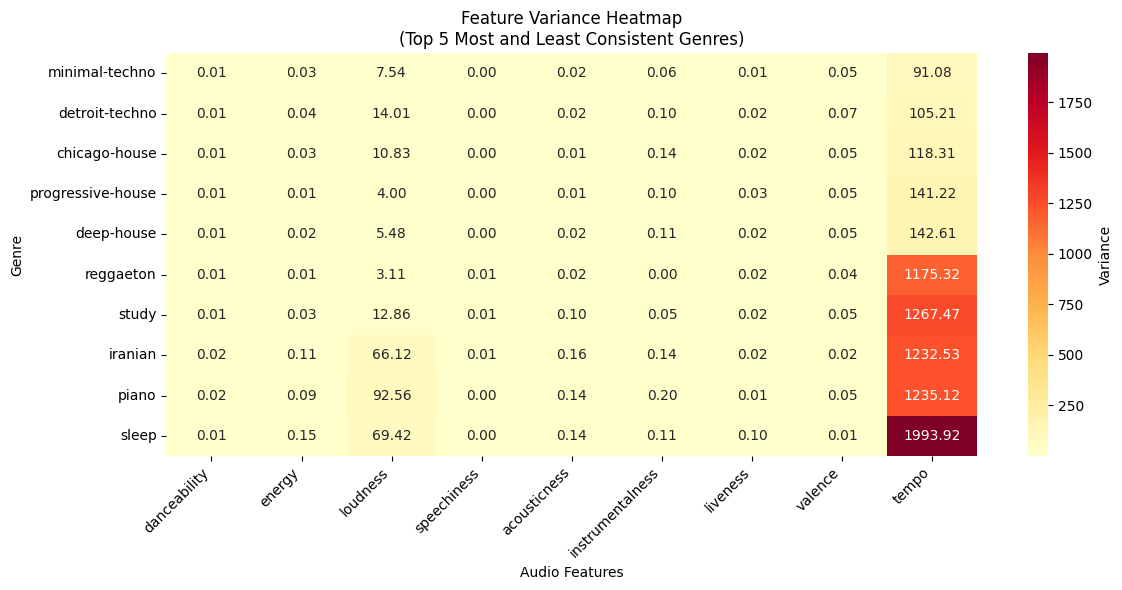

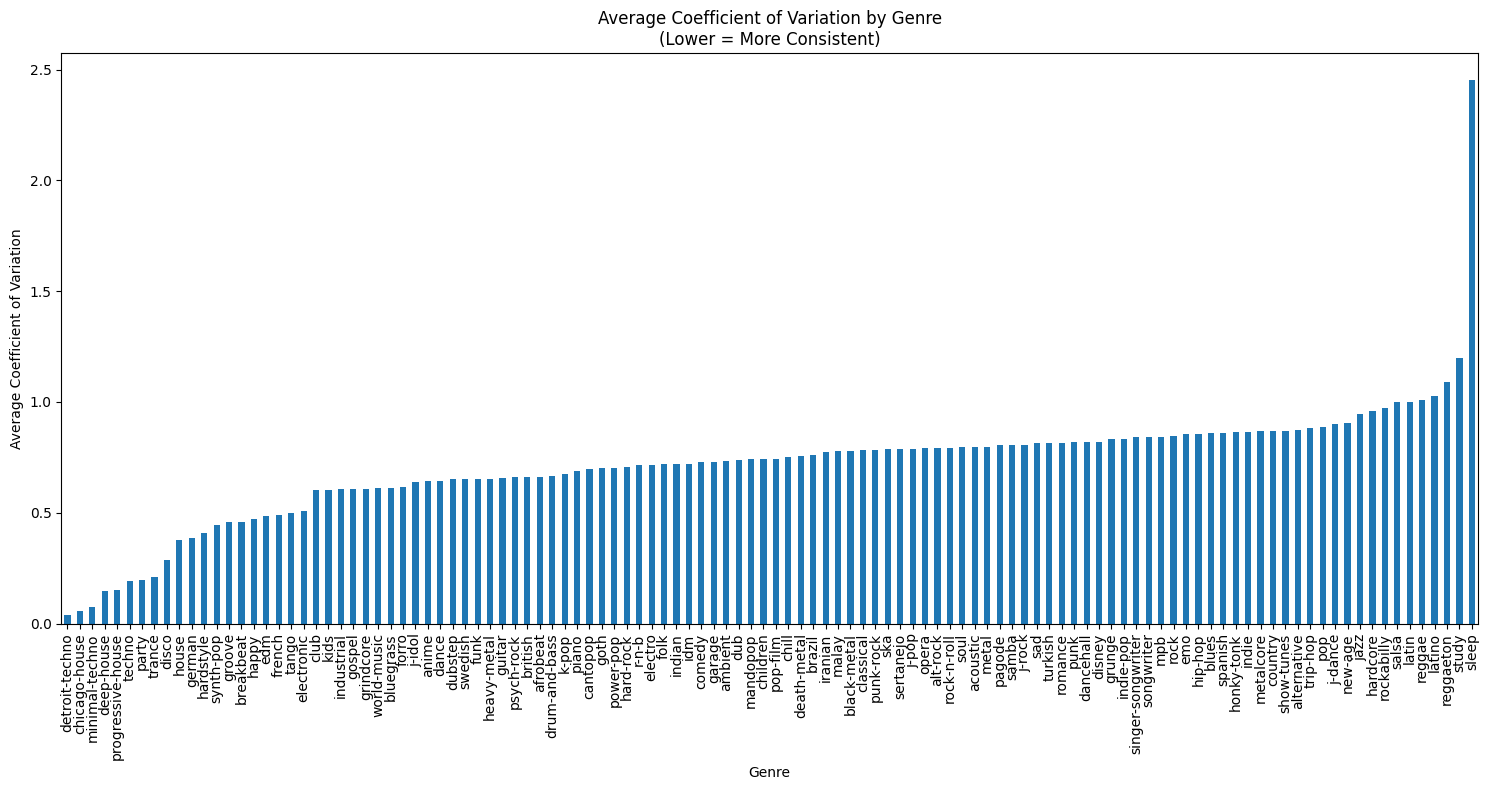


Summary of genre consistency:

Genres with most consistent audio features (lowest CV):
track_genre
detroit-techno       0.040966
chicago-house        0.055664
minimal-techno       0.075832
deep-house           0.149257
progressive-house    0.153387
techno               0.192711
party                0.196897
trance               0.211464
disco                0.287595
house                0.376055
dtype: float64

Genres with most variable audio features (highest CV):
track_genre
jazz          0.944340
hardcore      0.957318
rockabilly    0.973805
salsa         0.997808
latin         1.000457
reggae        1.010527
latino        1.024871
reggaeton     1.089841
study         1.197595
sleep         2.451644
dtype: float64

Features ranked by consistency across all genres:
speechiness           0.006248
danceability          0.017645
liveness              0.030777
energy                0.034488
valence               0.046798
instrumentalness      0.052520
acousticness          0.056682
loud

In [ ]:
# Calculate the mean and variance of features for each genre
genre_means = spotify_tracks.groupby('track_genre')[features].mean()
genre_variances = spotify_tracks.groupby('track_genre')[features].var()

# Calculate total variance (sum of variances across all features) for each genre
total_variance_by_genre = genre_variances.sum(axis=1).sort_values(ascending=True)

# Plot the total variance by genre
plt.figure(figsize=(15, 8))
total_variance_by_genre.plot(kind='bar')
plt.title('Total Variance of Audio Features by Genre\n(Lower variance = More tightly clustered)')
plt.xlabel('Genre')
plt.ylabel('Total Variance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Let's also look at feature-specific variance for top and bottom 5 genres
top_5_consistent = total_variance_by_genre.head()
bottom_5_consistent = total_variance_by_genre.tail()

print("\nMost consistently clustered genres (lowest variance):")
print(top_5_consistent)
print("\nLeast consistently clustered genres (highest variance):")
print(bottom_5_consistent)

# Create a heatmap of variances for the most and least consistent genres
genres_to_plot = list(top_5_consistent.index) + list(bottom_5_consistent.index)
variance_heatmap_data = genre_variances.loc[genres_to_plot]

plt.figure(figsize=(12, 6))
sns.heatmap(variance_heatmap_data, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.2f',
            cbar_kws={'label': 'Variance'})
plt.title('Feature Variance Heatmap\n(Top 5 Most and Least Consistent Genres)')
plt.xlabel('Audio Features')
plt.ylabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate coefficient of variation (CV) to account for different scales of features
genre_cv = genre_variances.div(genre_means).mean(axis=1).sort_values()

plt.figure(figsize=(15, 8))
genre_cv.plot(kind='bar')
plt.title('Average Coefficient of Variation by Genre\n(Lower = More Consistent)')
plt.xlabel('Genre')
plt.ylabel('Average Coefficient of Variation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of genre consistency:")
print("\nGenres with most consistent audio features (lowest CV):")
print(genre_cv.head(10))
print("\nGenres with most variable audio features (highest CV):")
print(genre_cv.tail(10))

# Calculate feature-specific consistency across genres
feature_consistency = genre_variances.mean().sort_values()
print("\nFeatures ranked by consistency across all genres:")
print(feature_consistency)

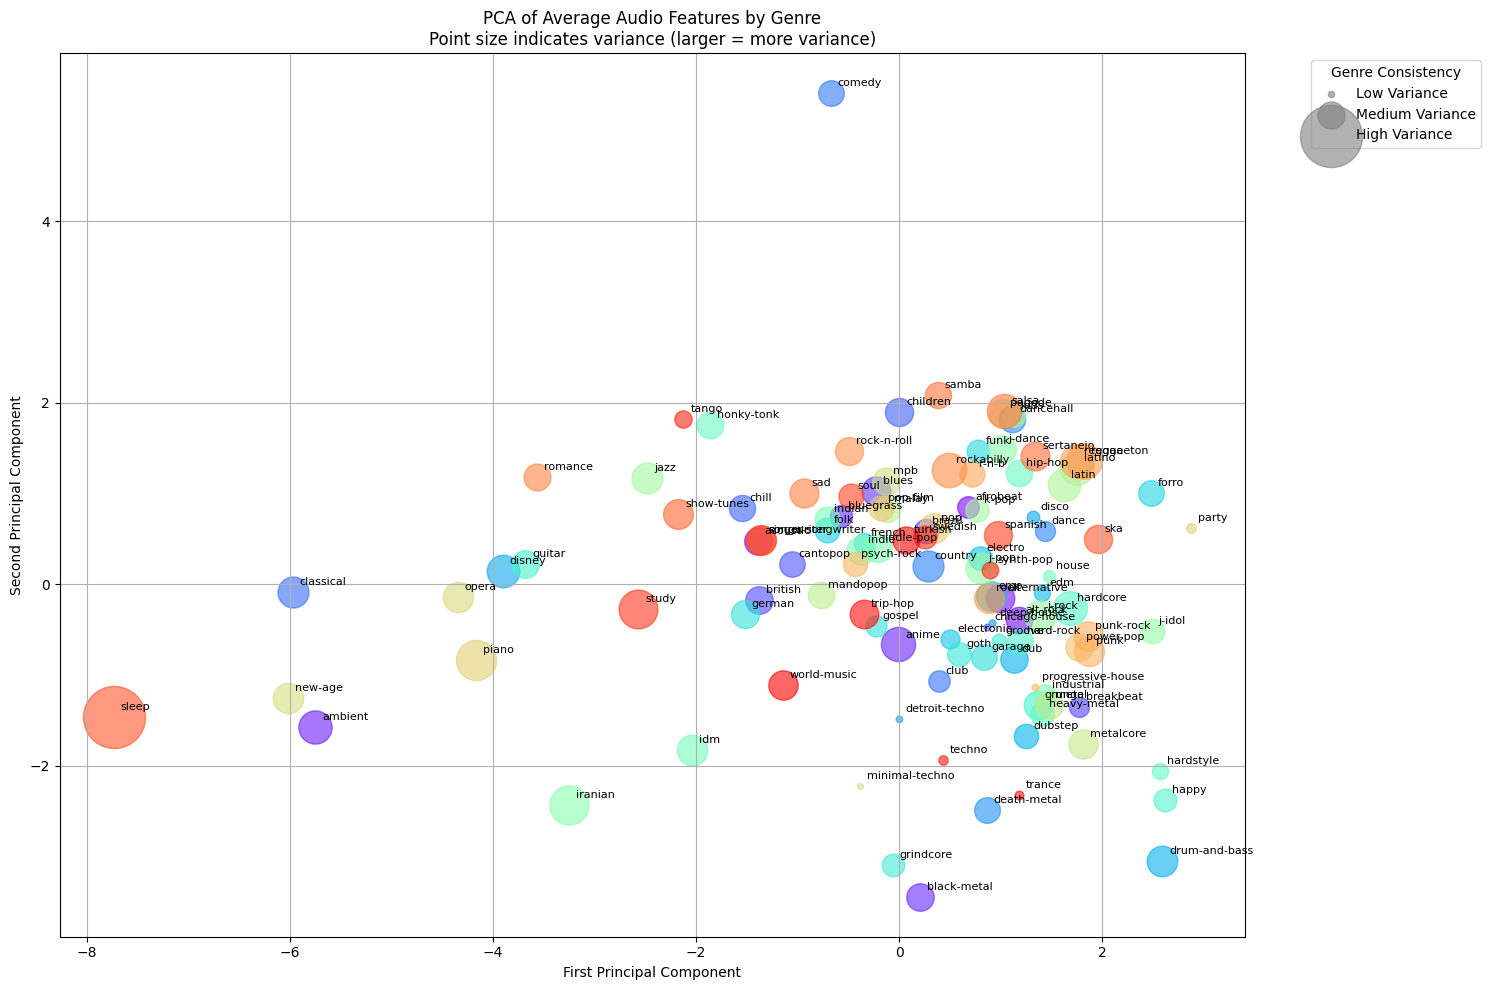


Genres with highest variance (most spread out):
track_genre
sleep        2063.867853
piano        1328.192651
iranian      1299.148078
study        1280.580575
reggaeton    1178.534686
dtype: float64

Genres with lowest variance (most tightly clustered):
track_genre
minimal-techno        98.803041
detroit-techno       119.471702
chicago-house        129.388950
progressive-house    145.427269
deep-house           148.323772
dtype: float64


In [13]:
# Calculate variance for each genre across all features
genre_variances = spotify_tracks.groupby('track_genre')[features].var()
total_variance_by_genre = genre_variances.sum(axis=1)

# Use a much larger range for sizes and apply exponential scaling for more contrast
min_size = 20    # Made minimum size smaller
max_size = 2000  # Made maximum size larger
# Apply exponential scaling to increase contrast
variance_scaled = np.power(total_variance_by_genre, 2)  # Square the variances
normalized_sizes = ((variance_scaled - variance_scaled.min()) / 
                   (variance_scaled.max() - variance_scaled.min()) * 
                   (max_size - min_size) + min_size)

# Plot PCA results for genre centroids with variance-based sizes
plt.figure(figsize=(15, 10))
colors = plt.cm.rainbow(np.linspace(0, 1, len(genre_centroids.index)))

# Create scatter plot with genre names as annotations
for i, (genre, color) in enumerate(zip(genre_centroids.index, colors)):
    # Get the size for this genre
    point_size = normalized_sizes[genre]
    
    plt.scatter(X_pca_centroids[i, 0], 
               X_pca_centroids[i, 1], 
               color=color,
               s=point_size,  # Size based on variance
               alpha=0.6)     # Add some transparency
    
    # Add genre name as text annotation
    plt.annotate(genre, 
                (X_pca_centroids[i, 0], X_pca_centroids[i, 1]),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Average Audio Features by Genre\nPoint size indicates variance (larger = more variance)')

# Add a legend for size reference
variance_levels = [total_variance_by_genre.min(), 
                  total_variance_by_genre.quantile(0.5),  # Using median instead of mean
                  total_variance_by_genre.max()]
labels = ['Low Variance', 'Medium Variance', 'High Variance']
legend_elements = []

# Plot reference points outside the visible area
for var, label in zip(variance_levels, labels):
    var_scaled = np.power(var, 2)  # Apply same exponential scaling
    size = ((var_scaled - variance_scaled.min()) / 
            (variance_scaled.max() - variance_scaled.min()) * 
            (max_size - min_size) + min_size)
    legend_elements.append(plt.scatter([], [], s=size, c='gray', alpha=0.6, label=label))

plt.legend(handles=legend_elements, title="Genre Consistency", 
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

# Print some statistics about the variances
print("\nGenres with highest variance (most spread out):")
print(total_variance_by_genre.nlargest(5))
print("\nGenres with lowest variance (most tightly clustered):")
print(total_variance_by_genre.nsmallest(5))

In [36]:
import plotly.express as px
import plotly.graph_objects as go

# Create interactive 3D scatter plot
fig = go.Figure()

# Adjust size scaling for better visibility
min_marker_size = 10
max_marker_size = 50
normalized_sizes = ((variance_scaled - variance_scaled.min()) / 
                   (variance_scaled.max() - variance_scaled.min()) * 
                   (max_marker_size - min_marker_size) + min_marker_size)

for i, (genre, color) in enumerate(zip(genre_centroids.index, colors)):
    point_size = normalized_sizes[genre]
    
    fig.add_trace(go.Scatter3d(
        x=[X_pca_centroids_3d[i, 0]],
        y=[X_pca_centroids_3d[i, 1]],
        z=[X_pca_centroids_3d[i, 2]],
        mode='markers+text',
        name=genre,
        text=[genre],
        marker=dict(
            size=point_size,  # Removed the division that was making points too small
            color=f'rgba({int(color[0]*255)},{int(color[1]*255)},{int(color[2]*255)},0.8)',
            symbol='circle',
            line=dict(
                color='white',
                width=1
            )
        ),
        textposition="top center",
        hoverinfo='text+name',
        hoverlabel=dict(namelength=-1)
    ))

fig.update_layout(
    title='Interactive 3D PCA of Audio Features by Genre',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)  # Adjust the camera view
        )
    ),
    width=1200,
    height=800,
    showlegend=True,
    legend=dict(
        itemsizing='constant',
        font=dict(size=10)
    )
)

fig.show()

In [15]:
# Clean track and artist names by removing white spaces and converting to lowercase
spotify_tracks['track_clean'] = spotify_tracks['track_name'].str.lower().str.strip()
spotify_tracks['artist_clean'] = spotify_tracks['artists'].str.lower().str.strip()

playlists_df['track_clean'] = playlists_df['trackname'].str.lower().str.strip()
playlists_df['artist_clean'] = playlists_df['artistname'].str.lower().str.strip()


# 1. How many playlists had every song in that dataset

In [16]:
spotify_pairs = set(zip(spotify_tracks['track_clean'], spotify_tracks['artist_clean']))

In [17]:
def get_playlist_match_percentage(group):
    playlist_pairs = set(zip(group['track_clean'], group['artist_clean']))
    matches = len(playlist_pairs.intersection(spotify_pairs))
    return (matches / len(playlist_pairs)) * 100

In [18]:
match_percentages = playlists_df.groupby(['playlistname', 'user_id']).apply(get_playlist_match_percentage)

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/810134752.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [19]:
fully_matched = sum(match_percentages >= 99.9)  # Using 99.9% threshold for floating point precision
total_playlists = len(match_percentages)

In [20]:
print(f"Total playlists: {total_playlists:,}")
print(f"Fully matched playlists: {fully_matched:,}")
print(f"Percentage fully matched: {(fully_matched/total_playlists)*100:.2f}%")

Total playlists: 231,799
Fully matched playlists: 1,860
Percentage fully matched: 0.80%


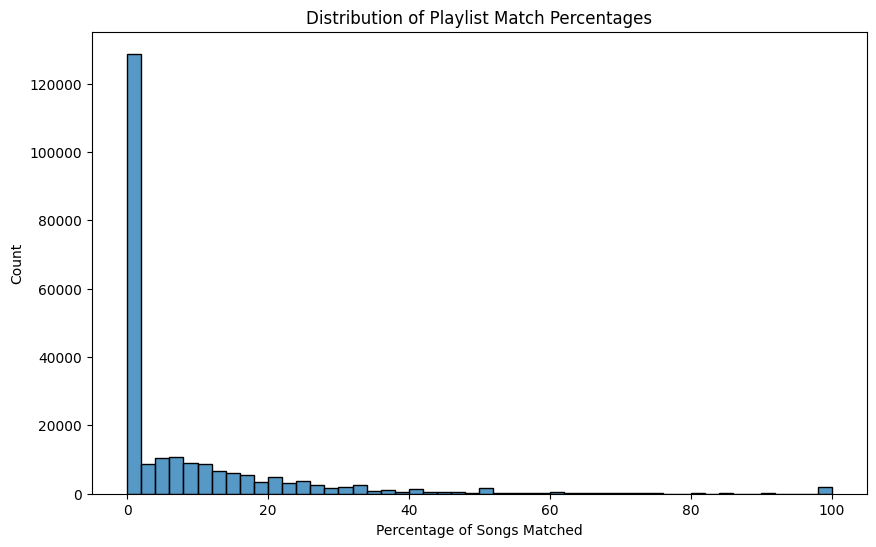

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(match_percentages, bins=50)
plt.title('Distribution of Playlist Match Percentages')
plt.xlabel('Percentage of Songs Matched')
plt.ylabel('Count')
plt.show()

# 2. Audio Features Analysis

In [22]:
spotify_tracks.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'track_clean', 'artist_clean'],
      dtype='object')

In [23]:
df = pd.read_csv('data/full_data.csv')

In [24]:
def analyze_audio_features():
    features = ['danceability', 'energy', 'loudness', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    for idx, feature in enumerate(features):
        row, col = divmod(idx, 3)
        
        
        sns.histplot(data=df, x=feature, ax=axes[row, col])
            
        axes[row, col].set_title(f'{feature.capitalize()} Distribution')
        axes[row, col].axvline(df[feature].mean(), color='r', linestyle='--', 
                              label=f'Mean: {df[feature].mean():.2f}')
        axes[row, col].legend()
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Audio Feature Correlations')
    plt.show()

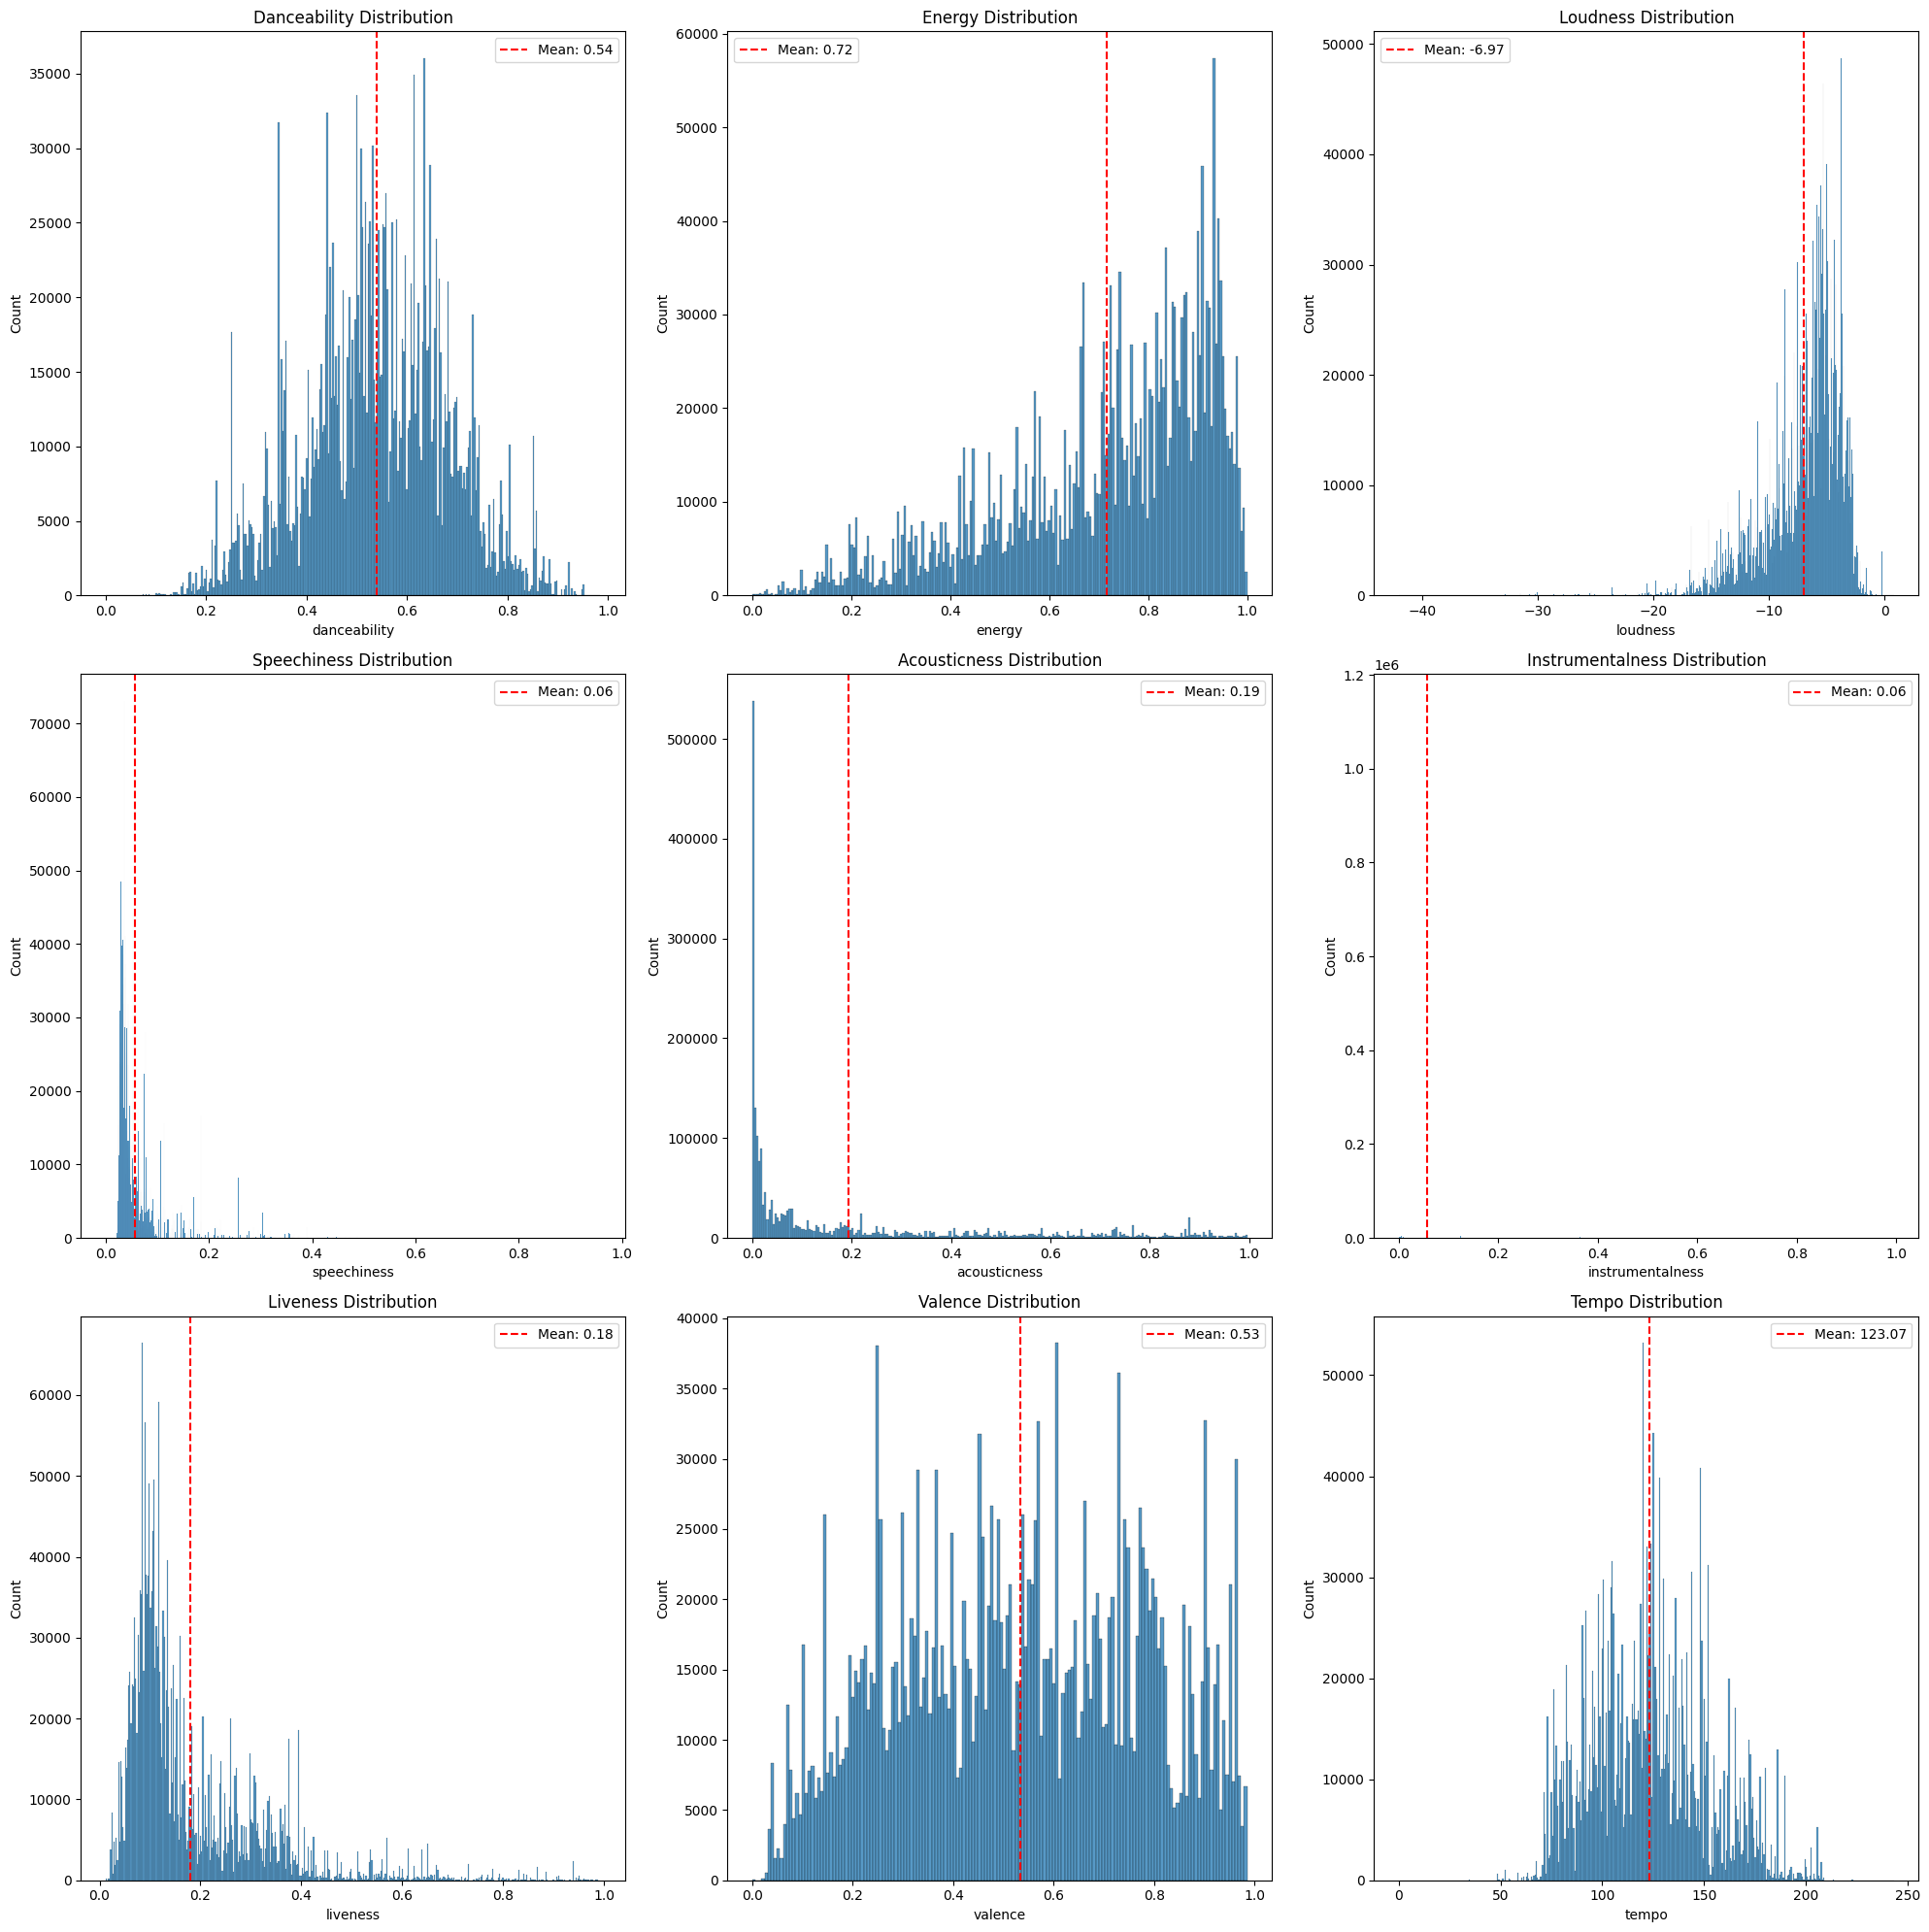

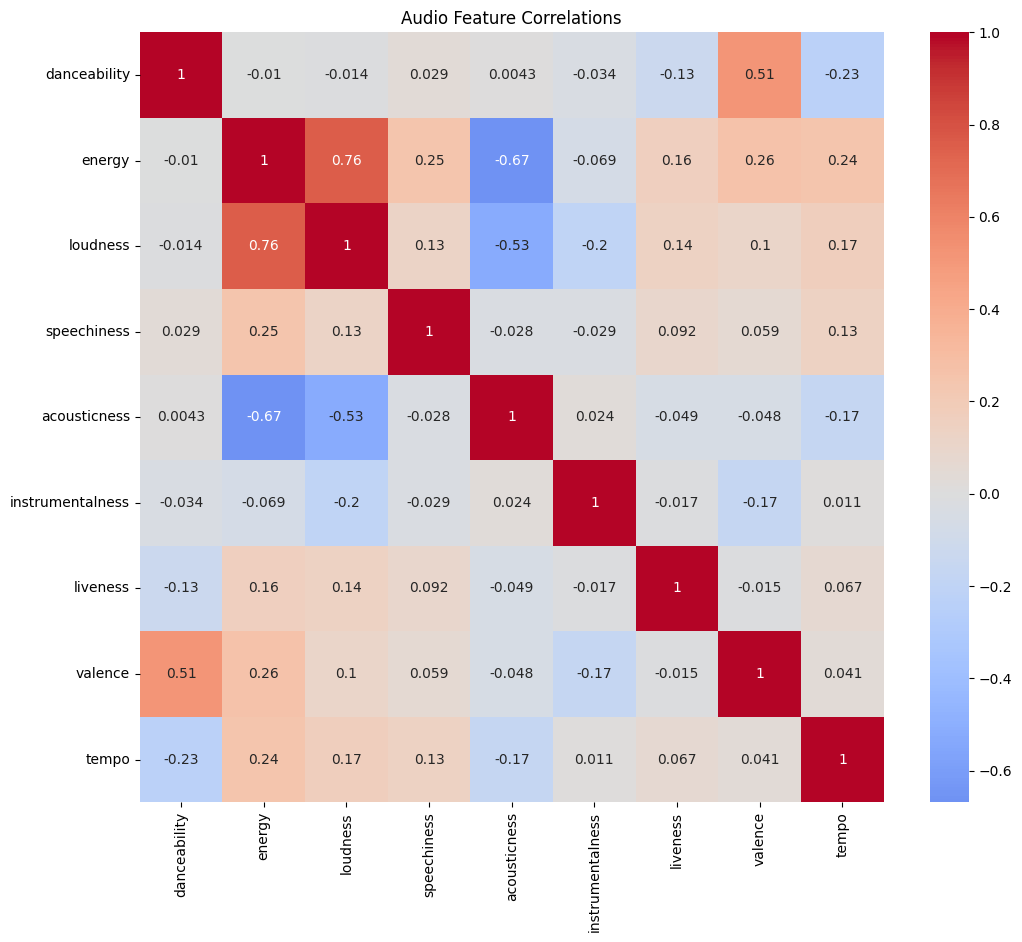

In [25]:
analyze_audio_features()

In [26]:
print("\nSummary Statistics:")
print(df[['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence']].describe())


Summary Statistics:
       danceability        energy  acousticness  instrumentalness  \
count  2.307822e+06  2.307822e+06  2.307822e+06      2.307822e+06   
mean   5.402183e-01  7.156558e-01  1.930083e-01      5.722300e-02   
std    1.428540e-01  2.130105e-01  2.709047e-01      1.756626e-01   
min    0.000000e+00  2.020000e-05  0.000000e+00      0.000000e+00   
25%    4.460000e-01  5.830000e-01  5.040000e-03      0.000000e+00   
50%    5.430000e-01  7.670000e-01  5.130000e-02      4.770000e-05   
75%    6.400000e-01  8.890000e-01  2.750000e-01      2.940000e-03   
max    9.850000e-01  1.000000e+00  9.960000e-01      9.950000e-01   

            valence  
count  2.307822e+06  
mean   5.328254e-01  
std    2.450925e-01  
min    0.000000e+00  
25%    3.290000e-01  
50%    5.370000e-01  
75%    7.370000e-01  
max    9.850000e-01  


# 3. Playlist Music Distribution

In [27]:
# Audio features to analyze
features = ['popularity', 'danceability', 'energy', 'key', 'loudness', 
           'mode', 'speechiness', 'acousticness', 'instrumentalness', 
           'liveness', 'valence', 'tempo']

In [28]:
# Calculate playlist-level statistics
playlist_stats = df.groupby(['playlistname', 'user_id']).agg({
    'track_clean': ['count'],
    'popularity': ['mean', 'std'],
    'danceability': ['mean', 'std'],
    'energy': ['mean', 'std'],
    'tempo': ['mean', 'std']
}).reset_index()

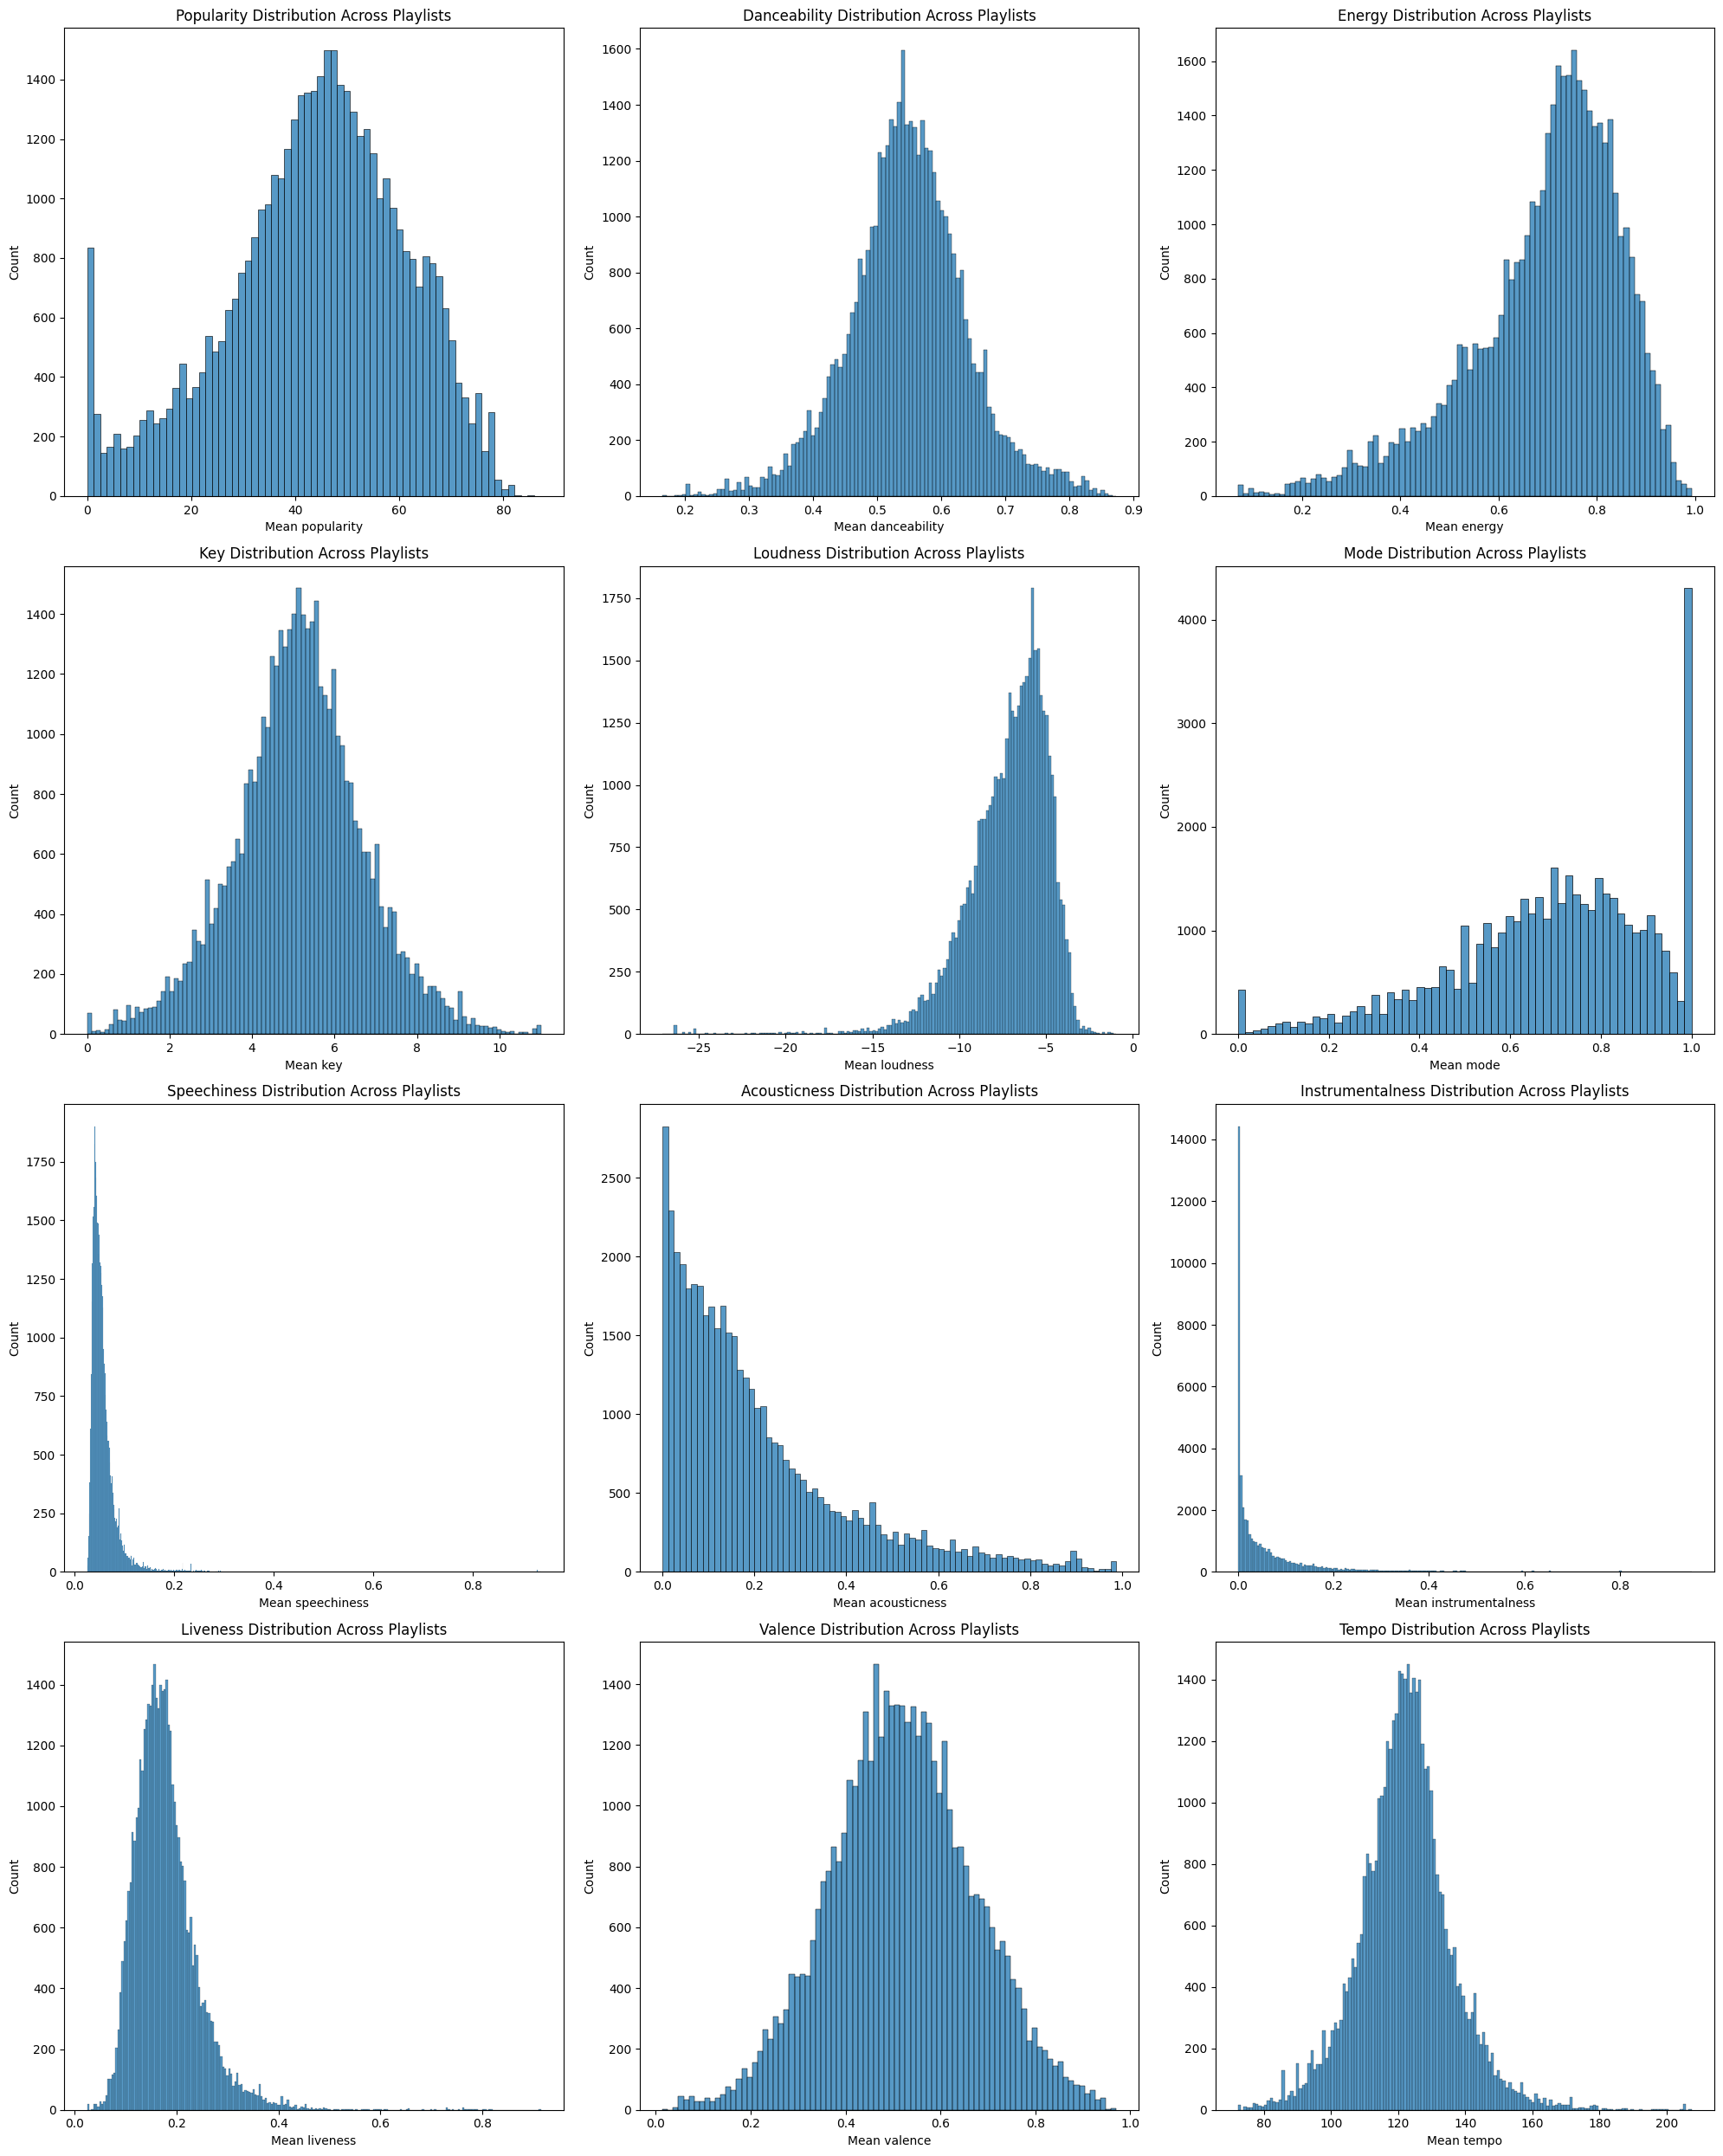

In [29]:
# Create subplots (4 rows, 3 columns)
fig, axes = plt.subplots(4, 3, figsize=(20, 25))
axes = axes.ravel()

# Plot distribution for each feature
for idx, feature in enumerate(features):
    # Calculate mean and std per playlist
    mean_data = df.groupby(['playlistname', 'user_id'])[feature].mean().reset_index(name=f'mean_{feature}')
    std_data = df.groupby(['playlistname', 'user_id'])[feature].std().reset_index(name=f'std_{feature}')
    
    # Create subplot
    sns.histplot(data=mean_data, x=f'mean_{feature}', ax=axes[idx])
    axes[idx].set_title(f'{feature.capitalize()} Distribution Across Playlists')
    axes[idx].set_xlabel(f'Mean {feature}')

plt.tight_layout()
plt.show()

# Normalize features 0 to 1

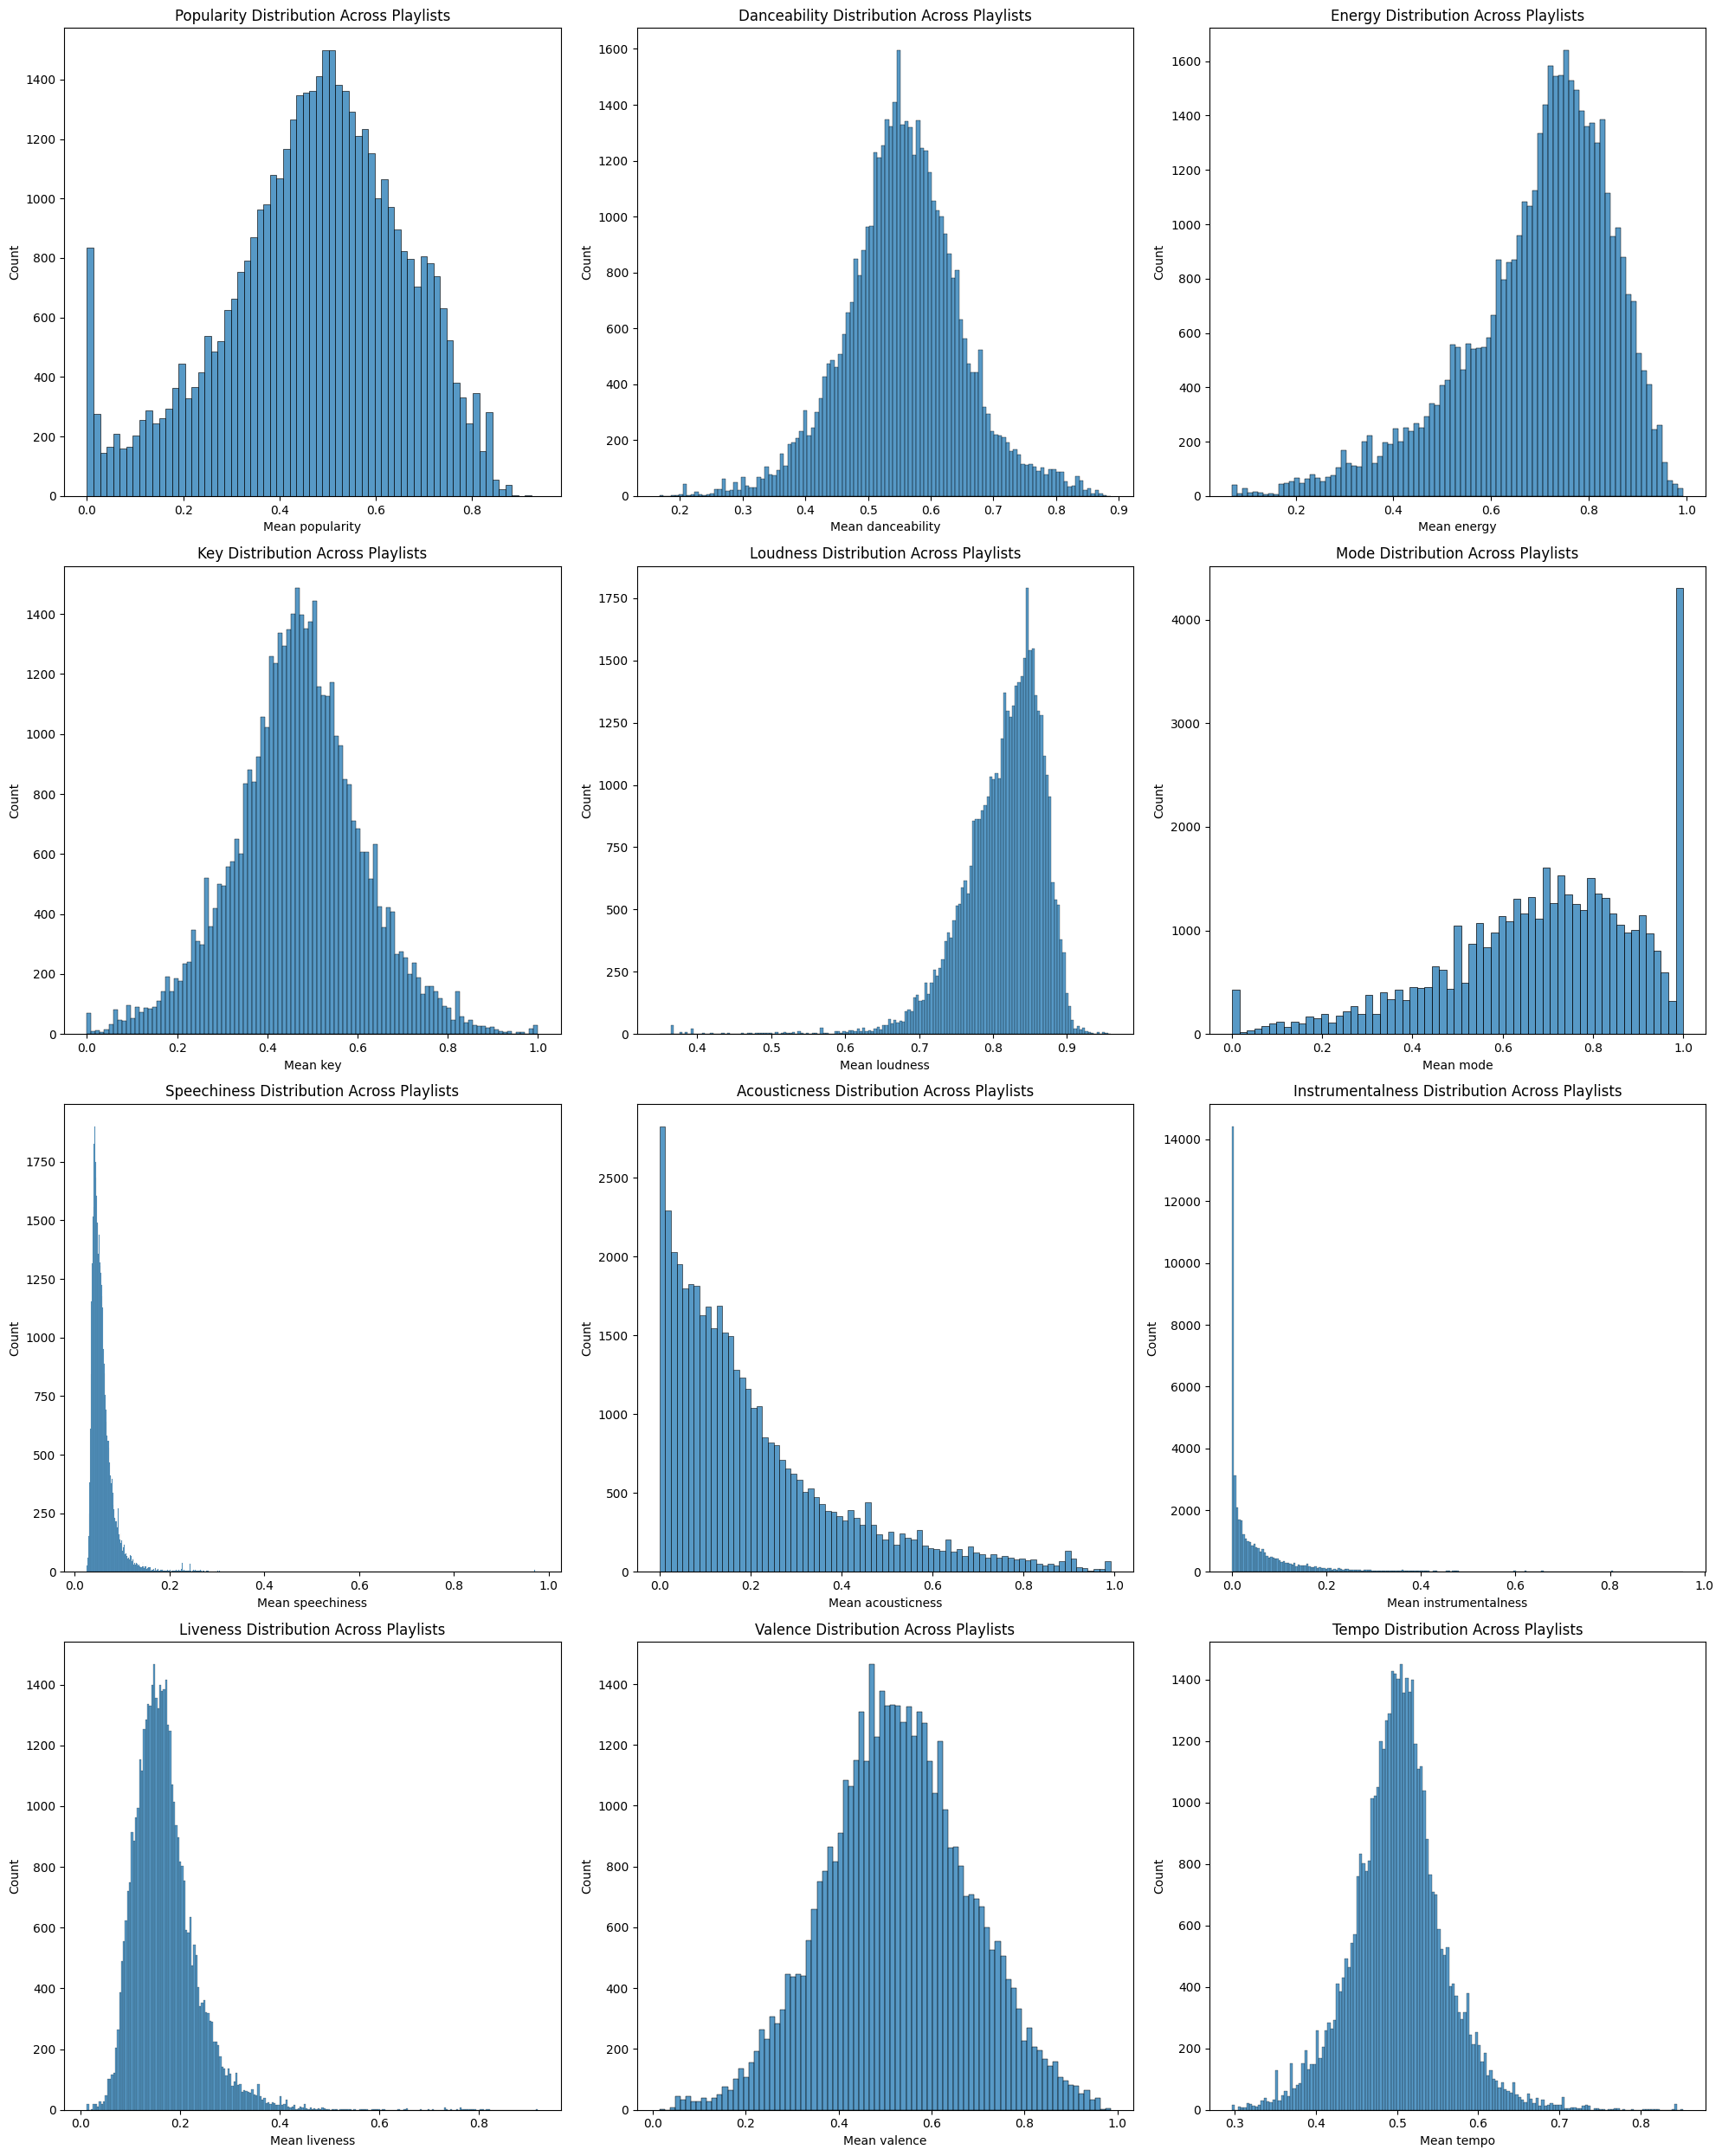


Summary Statistics:

Popularity:
Average mean per playlist: 0.47
Average variation within playlists (std): 0.29

Danceability:
Average mean per playlist: 0.56
Average variation within playlists (std): 0.11

Energy:
Average mean per playlist: 0.70
Average variation within playlists (std): 0.15

Key:
Average mean per playlist: 0.47
Average variation within playlists (std): 0.28

Loudness:
Average mean per playlist: 0.81
Average variation within playlists (std): 0.06

Mode:
Average mean per playlist: 0.69
Average variation within playlists (std): 0.39

Speechiness:
Average mean per playlist: 0.06
Average variation within playlists (std): 0.03

Acousticness:
Average mean per playlist: 0.21
Average variation within playlists (std): 0.17

Instrumentalness:
Average mean per playlist: 0.07
Average variation within playlists (std): 0.11

Liveness:
Average mean per playlist: 0.17
Average variation within playlists (std): 0.11

Valence:
Average mean per playlist: 0.53
Average variation within pl

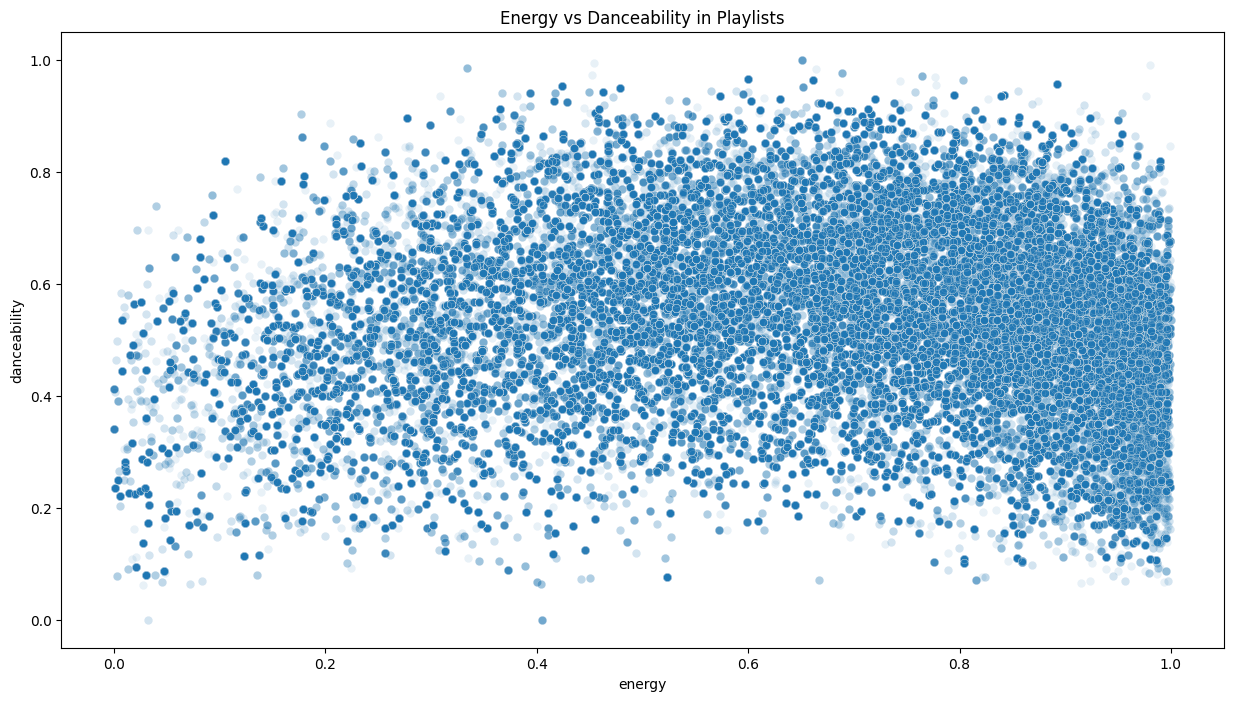

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/full_data.csv')

# Audio features to analyze
features = ['popularity', 'danceability', 'energy', 'key', 'loudness', 
           'mode', 'speechiness', 'acousticness', 'instrumentalness', 
           'liveness', 'valence', 'tempo']

# Normalize specified features to range [0, 1]
features_to_normalize = ['popularity', 'danceability', 'energy', 'key', 'loudness', 
                         'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                         'liveness', 'valence', 'tempo']

df[features_to_normalize] = (df[features_to_normalize] - df[features_to_normalize].min()) / (df[features_to_normalize].max() - df[features_to_normalize].min())


# Create subplots (4 rows, 3 columns)
fig, axes = plt.subplots(4, 3, figsize=(20, 25))
axes = axes.ravel()

# Plot distribution for each feature
for idx, feature in enumerate(features):
    # Calculate mean and std per playlist
    mean_data = df.groupby(['playlistname', 'user_id'])[feature].mean().reset_index(name=f'mean_{feature}')
    std_data = df.groupby(['playlistname', 'user_id'])[feature].std().reset_index(name=f'std_{feature}')
    
    # Create subplot
    sns.histplot(data=mean_data, x=f'mean_{feature}', ax=axes[idx])
    axes[idx].set_title(f'{feature.capitalize()} Distribution Across Playlists')
    axes[idx].set_xlabel(f'Mean {feature}')

plt.tight_layout()
plt.show()

# Print summary statistics for all features
print("\nSummary Statistics:")
for feature in features:
    mean = df.groupby(['playlistname', 'user_id'])[feature].mean().mean()
    std = df.groupby(['playlistname', 'user_id'])[feature].std().mean()
    print(f"\n{feature.capitalize()}:")
    print(f"Average mean per playlist: {mean:.2f}")
    print(f"Average variation within playlists (std): {std:.2f}")

# Additional scatter plots to show relationships
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='energy', y='danceability', alpha=0.1)
plt.title('Energy vs Danceability in Playlists')
plt.show()

In [31]:
# Print summary statistics for all features
print("\nSummary Statistics:")
for feature in features:
    mean = df.groupby(['playlistname', 'user_id'])[feature].mean().mean()
    std = df.groupby(['playlistname', 'user_id'])[feature].std().mean()
    print(f"\n{feature.capitalize()}:")
    print(f"Average mean per playlist: {mean:.2f}")
    print(f"Average variation within playlists (std): {std:.2f}")



Summary Statistics:

Popularity:
Average mean per playlist: 0.47
Average variation within playlists (std): 0.29

Danceability:
Average mean per playlist: 0.56
Average variation within playlists (std): 0.11

Energy:
Average mean per playlist: 0.70
Average variation within playlists (std): 0.15

Key:
Average mean per playlist: 0.47
Average variation within playlists (std): 0.28

Loudness:
Average mean per playlist: 0.81
Average variation within playlists (std): 0.06

Mode:
Average mean per playlist: 0.69
Average variation within playlists (std): 0.39

Speechiness:
Average mean per playlist: 0.06
Average variation within playlists (std): 0.03

Acousticness:
Average mean per playlist: 0.21
Average variation within playlists (std): 0.17

Instrumentalness:
Average mean per playlist: 0.07
Average variation within playlists (std): 0.11

Liveness:
Average mean per playlist: 0.17
Average variation within playlists (std): 0.11

Valence:
Average mean per playlist: 0.53
Average variation within pl

# 4. Clustering of Songs in each playlist

In [32]:
# Compare to random baseline
n_samples = 10000
random_distances = []
for _ in range(n_samples):
    random_idx = np.random.choice(len(df), size=50)  # Sample 50 random songs
    random_features = features_scaled[random_idx]
    distances = pairwise_distances(random_features)
    avg_distance = np.mean(distances[np.triu_indices(len(distances), k=1)])
    random_distances.append(avg_distance)

print(f"\nRandom baseline mean distance: {np.mean(random_distances):.3f}")
print(f"Percentage of playlists more cohesive than random: {(np.mean(playlist_distances) < np.mean(random_distances))*100:.1f}%")

NameError: name 'features_scaled' is not defined

In [ ]:
# Features for clustering analysis

features = ['danceability', 'energy', 'loudness', 'speechiness', 
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(features_scaled, columns=features)

# Calculate within-playlist distances
playlist_distances = []
playlist_sizes = []
for name, group in df.groupby(['playlistname', 'user_id']):
    if len(group) > 1:  # Need at least 2 songs to calculate distances
        group_features = scaler.transform(group[features])
        # Calculate pairwise distances within playlist
        distances = pairwise_distances(group_features)
        # Get average distance
        avg_distance = np.mean(distances[np.triu_indices(len(distances), k=1)])
        playlist_distances.append(avg_distance)
        playlist_sizes.append(len(group))



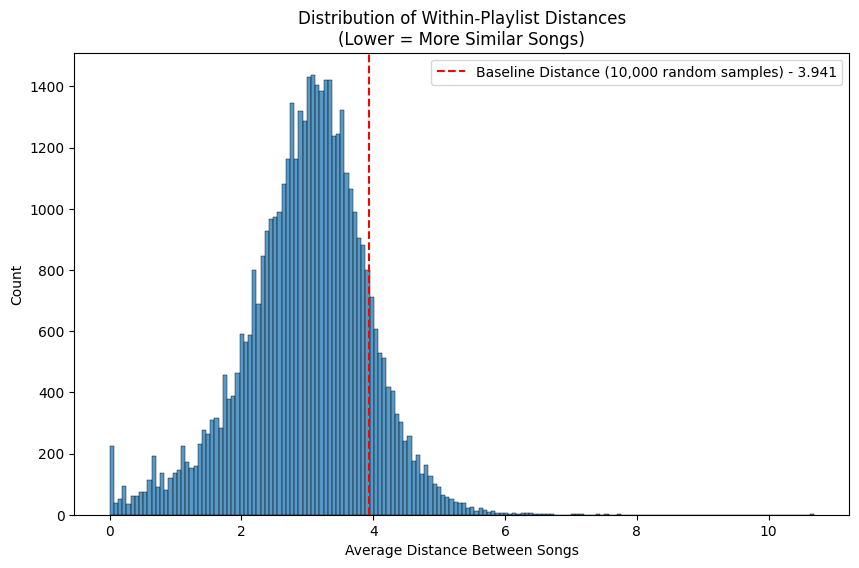

In [ ]:
# Plot distribution of cohesion scores
plt.figure(figsize=(10, 6))
plt.axvline(x=3.941, color='red', linestyle='--', label='Baseline Distance (10,000 random samples) - 3.941')  # Add the line and label
sns.histplot(playlist_distances)
plt.title('Distribution of Within-Playlist Distances\n(Lower = More Similar Songs)')
plt.xlabel('Average Distance Between Songs')
plt.ylabel('Count')
plt.legend()  # Add the legend to include the label for the vertical line
plt.show()


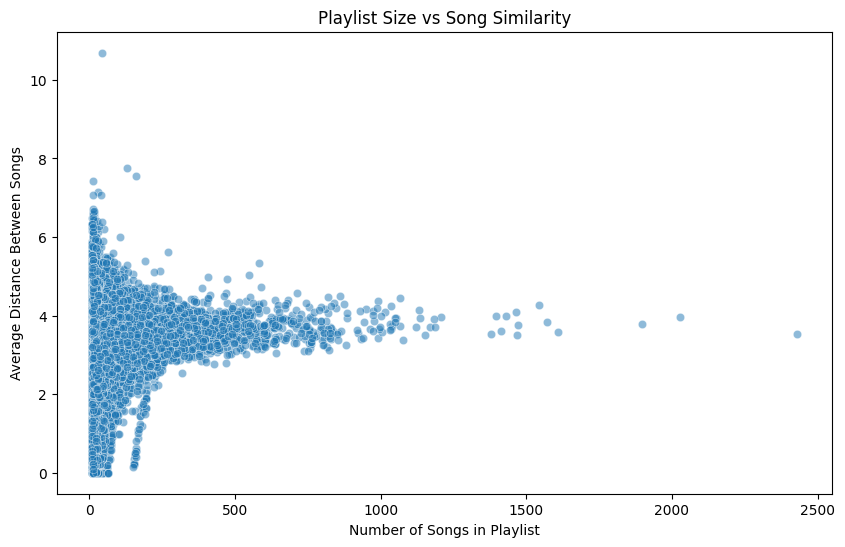

In [ ]:
# Scatter plot of playlist size vs cohesion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=playlist_sizes, y=playlist_distances, alpha=0.5)
plt.title('Playlist Size vs Song Similarity')
plt.xlabel('Number of Songs in Playlist')
plt.ylabel('Average Distance Between Songs')
plt.show()

In [ ]:
# Print summary statistics
print("\nCohesion Statistics:")
print(f"Mean distance between songs: {np.mean(playlist_distances):.3f}")
print(f"Median distance between songs: {np.median(playlist_distances):.3f}")
print(f"Std dev of distances: {np.std(playlist_distances):.3f}")


Cohesion Statistics:
Mean distance between songs: 2.979
Median distance between songs: 3.052
Std dev of distances: 0.937


In [ ]:
def get_feature_cohesion(group, feature):
    return np.std(group[feature])

# Calculate cohesion scores and sizes
playlist_data = []
for name, group in df.groupby(['playlistname', 'user_id']):
    if len(group) > 1:
        feature_cohesion = {f"{feature}_std": np.std(group[feature]) for feature in features}
        playlist_data.append({
            'playlist_name': name[0],
            'size': len(group),
            'overall_cohesion': np.mean([feature_cohesion[f"{f}_std"] for f in features]),
            **feature_cohesion
        })

playlist_df = pd.DataFrame(playlist_data)

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_68042/357133085.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(features, rotation=45)


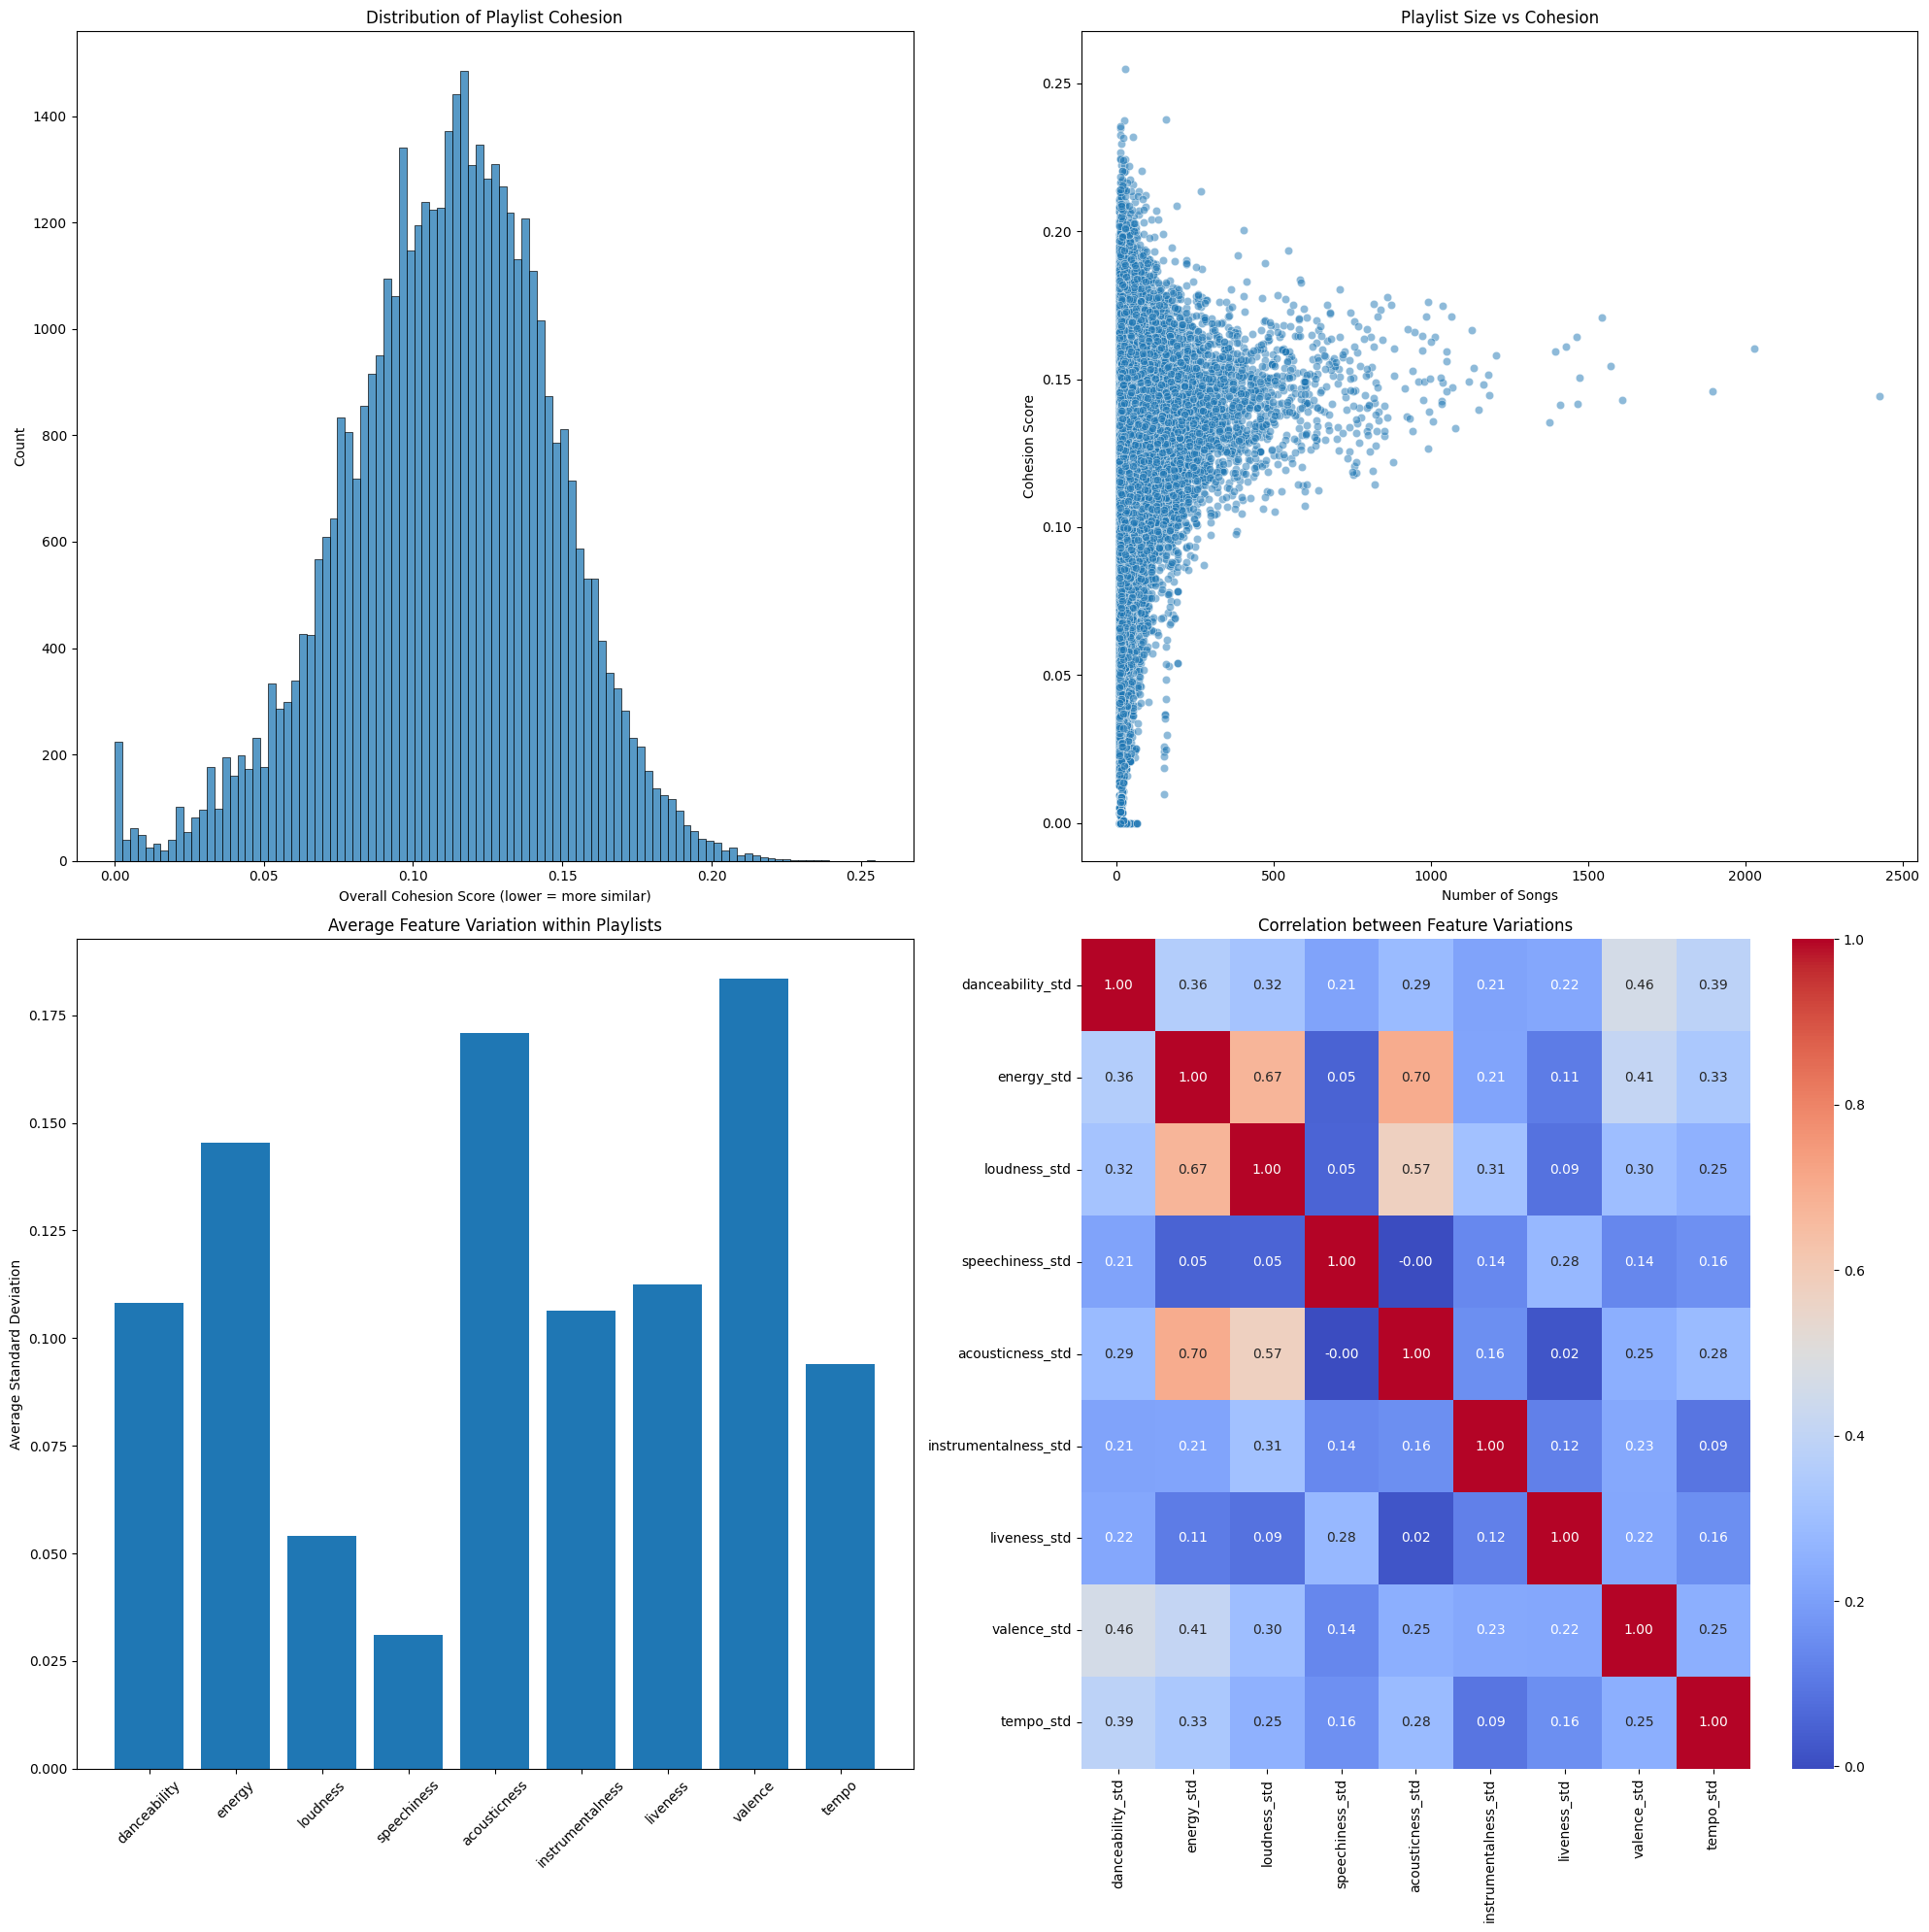

In [ ]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# 1. Overall cohesion distribution
sns.histplot(data=playlist_df, x='overall_cohesion', ax=axes[0,0])
axes[0,0].set_title('Distribution of Playlist Cohesion')
axes[0,0].set_xlabel('Overall Cohesion Score (lower = more similar)')

# 2. Cohesion vs playlist size
sns.scatterplot(data=playlist_df, x='size', y='overall_cohesion', ax=axes[0,1], alpha=0.5)
axes[0,1].set_title('Playlist Size vs Cohesion')
axes[0,1].set_xlabel('Number of Songs')
axes[0,1].set_ylabel('Cohesion Score')

# 3. Feature-specific cohesion
feature_means = [playlist_df[f"{f}_std"].mean() for f in features]
axes[1,0].bar(features, feature_means)
axes[1,0].set_title('Average Feature Variation within Playlists')
axes[1,0].set_xticklabels(features, rotation=45)
axes[1,0].set_ylabel('Average Standard Deviation')

# 4. Feature cohesion correlation heatmap
feature_cols = [f"{f}_std" for f in features]
sns.heatmap(playlist_df[feature_cols].corr(), 
            annot=True, 
            fmt='.2f',
            ax=axes[1,1],
            cmap='coolwarm')
axes[1,1].set_title('Correlation between Feature Variations')

plt.tight_layout()
plt.show()

In [ ]:
# Print insights
print("\nFeature Variation Rankings (lower = more consistent within playlists):")
feature_variations = {f: playlist_df[f"{f}_std"].mean() for f in features}
for feature, variation in sorted(feature_variations.items(), key=lambda x: x[1]):
    print(f"{feature}: {variation:.3f}")

# Identify most and least cohesive playlists
print("\nMost cohesive playlists (top 5):")
print(playlist_df.nsmallest(5, 'overall_cohesion')[['playlist_name', 'size', 'overall_cohesion']])

print("\nLeast cohesive playlists (top 5):")
print(playlist_df.nlargest(5, 'overall_cohesion')[['playlist_name', 'size', 'overall_cohesion']])


Feature Variation Rankings (lower = more consistent within playlists):
speechiness: 0.031
loudness: 0.054
tempo: 0.094
instrumentalness: 0.106
danceability: 0.108
liveness: 0.112
energy: 0.145
acousticness: 0.171
valence: 0.184

Most cohesive playlists (top 5):
                                          playlist_name  size  \
267   (If You're Wondering If I Want You To) I Want ...    16   
597                                              1 year    17   
4731         August & Everything After - Deluxe Edition    17   
4743                        August And Everything After    17   
7665                                          Christmas    16   

      overall_cohesion  
267                0.0  
597                0.0  
4731               0.0  
4743               0.0  
7665               0.0  

Least cohesive playlists (top 5):
              playlist_name  size  overall_cohesion
12337         February 2015    29          0.254723
32638               Starred   160          0.237753
15483

# Clustering of playlists Audio features

In [37]:
df.columns

Index(['playlistname', 'user_id', 'track_clean', 'artist_clean', 'album_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'XY', 'set'],
      dtype='object')

In [46]:
# Let's look at what genres we have and find playlists with high concentration of specific genres
# First, get genre distribution within each playlist
playlist_genre_dist = df.groupby(['playlistname', 'track_genre']).size().unstack(fill_value=0)

# Convert to percentages
playlist_genre_pct = playlist_genre_dist.div(playlist_genre_dist.sum(axis=1), axis=0) * 100

# Let's look at playlists with high percentage of specific genres
def find_genre_focused_playlists(genre, min_percentage=0):
    genre_playlists = playlist_genre_pct[playlist_genre_pct[genre] > min_percentage].sort_values(by=genre, ascending=False)
    return genre_playlists.index[:100]  # Return top 5 playlists

# Let's find playlists for different genres
genres_to_find = ['country', 'rock', 'pop', 'rap', 'jazz', 'classical', 'edm', 'metal', 'sleep', 'blues', 'hiphop']

print("Playlists with high concentration of specific genres:")
for genre in genres_to_find:
    try:
        top_playlists = find_genre_focused_playlists(genre)
        print(f"\nTop {genre} playlists:")
        # Print both playlist name and percentage of that genre
        for playlist in top_playlists:
            percentage = playlist_genre_pct.loc[playlist, genre]
            print(f"{playlist}: {percentage:.1f}% {genre}")
    except:
        print(f"No playlists found with high concentration of {genre}")

Playlists with high concentration of specific genres:

Top country playlists:
True Country: 100.0% country
Bootscootin Boogie (Line Dancers): 100.0% country
Favorite Country: 100.0% country
Country favs: 100.0% country
Country Stuff 01: 100.0% country
Country Music : 100.0% country
Country Crooners: 100.0% country
Honky Tonk Jams Doe: 100.0% country
You're Looking At Country: 100.0% country
Red, White, & Blue: 100.0% country
CUNTry Music That's Not Awful: 93.3% country
Wick's Top Country Mix: 90.9% country
DJ Set- Top Country Hits: 90.3% country
Back Roads: 90.2% country
*best of country*: 90.0% country
Countryme: 90.0% country
A little bit country: 90.0% country
The Country Cannon: 87.5% country
Country 2: 82.6% country
If Heaven Ain't A Lot Like Dixie I Don't Want to Go: 81.8% country
Amerikabil: 81.8% country
The best 80's and 90's country: 80.6% country
Nashville Soundtrack: 75.0% country
Fave Country: 75.0% country
80s & 90s Country Mix: 75.0% country
Dylan - Mixed: 73.3% country


In [58]:
# Create a list of the playlists we want to analyze
selected_playlists = [
    'Country Music ', 'Nashville Soundtrack',  # Country
    'artic monkeys and more', 'Imagine Dragons',  # Rock
    'christmas ', 'Christmas🎄🎅',  # Christmas
    'Jazz piano', 'LOUIS ARMSTRONG<3',  # Jazz
    'Northern String Quartet – Classical Chillout Playlist', 'Chilll Classical Piano',  # Classical
    'EDCLV15', 'Avicii 2', 'EDM Gym',  # EDM
    'Korn + Slipknot', 'Slipknot - Antennas To Hell',  # Metal
    'Nature Sounds – Rain Sleep', 'Sleep Sounds'  # Sleep
]

# Calculate average features for these specific playlists
playlist_centroids = df[df['playlistname'].isin(selected_playlists)].groupby('playlistname')[features].mean()

# Standardize the features
scaler = StandardScaler()
X_playlist_centroids = scaler.fit_transform(playlist_centroids)

# Perform PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_playlist_3d = pca_3d.fit_transform(X_playlist_centroids)

# Create interactive 3D scatter plot
import plotly.graph_objects as go

# Define colors for each genre category
genre_colors = {
    'country': '#1f77b4',    # blue
    'rock': '#ff7f0e',       # orange
    'christmas': '#2ca02c',  # green
    'jazz': '#d62728',       # red
    'classical': '#9467bd',  # purple
    'edm': '#8c564b',        # brown
    'metal': '#e377c2',      # pink
    'sleep': '#7f7f7f'       # gray
}

# Assign genres to playlists
playlist_genres = {
    'Country Music ': 'country', 'Nashville Soundtrack': 'country',
    'artic monkeys and more': 'rock', 'Imagine Dragons': 'rock',
    'christmas ': 'christmas', 'Christmas🎄🎅': 'christmas',
    'Jazz piano': 'jazz', 'LOUIS ARMSTRONG<3': 'jazz',
    'Northern String Quartet – Classical Chillout Playlist': 'classical', 'Chilll Classical Piano': 'classical',
    'EDCLV15': 'edm', 'Avicii 2': 'edm', 'EDM Gym': 'edm',
    'Korn + Slipknot': 'metal', 'Slipknot - Antennas To Hell': 'metal',
    'Nature Sounds – Rain Sleep': 'sleep', 'Sleep Sounds': 'sleep'
}

# Create 3D Plot
fig = go.Figure()

# Add each playlist as a point
for i, playlist_name in enumerate(playlist_centroids.index):
    genre = playlist_genres[playlist_name]
    color = genre_colors[genre]
    
    fig.add_trace(go.Scatter3d(
        x=[X_pca_playlist_3d[i, 0]],
        y=[X_pca_playlist_3d[i, 1]],
        z=[X_pca_playlist_3d[i, 2]],
        mode='markers+text',
        name=f"{playlist_name} ({genre})",
        text=[playlist_name],
        marker=dict(
            size=30,
            color=color,
            symbol='circle',
            line=dict(
                color='white',
                width=1
            )
        ),
        textposition="top center",
        hoverinfo='text+name',
        hoverlabel=dict(namelength=-1)
    ))

fig.update_layout(
    title='3D PCA of Selected Playlists Audio Features',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    width=1200,
    height=800,
    showlegend=True,
    legend=dict(
        itemsizing='constant',
        font=dict(size=10),
        traceorder='grouped',
        itemwidth=30
    )
)

fig.show()

In [59]:
# Create 2D PCA visualization
pca_2d = PCA(n_components=2)
X_pca_playlist_2d = pca_2d.fit_transform(X_playlist_centroids)

# Create interactive 2D scatter plot
fig_2d = go.Figure()

# Add each playlist as a point
for i, playlist_name in enumerate(playlist_centroids.index):
    genre = playlist_genres[playlist_name]
    color = genre_colors[genre]
    
    fig_2d.add_trace(go.Scatter(
        x=[X_pca_playlist_2d[i, 0]],
        y=[X_pca_playlist_2d[i, 1]],
        mode='markers+text',
        name=f"{playlist_name} ({genre})",
        text=[playlist_name],
        marker=dict(
            size=30,
            color=color,
            symbol='circle',
            line=dict(
                color='white',
                width=1
            )
        ),
        textposition="top center",
        hoverinfo='text+name',
        hoverlabel=dict(namelength=-1)
    ))

fig_2d.update_layout(
    title='2D PCA of Selected Playlists Audio Features',
    xaxis_title='First Principal Component',
    yaxis_title='Second Principal Component',
    width=1200,
    height=800,
    showlegend=True,
    legend=dict(
        itemsizing='constant',
        font=dict(size=10),
        traceorder='grouped',
        itemwidth=30
    )
)

# Print explained variance ratios
print("\nExplained variance ratio (3D):")
print(f"PC1: {pca_3d.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca_3d.explained_variance_ratio_[1]:.3f}")
print(f"PC3: {pca_3d.explained_variance_ratio_[2]:.3f}")
print(f"Total: {sum(pca_3d.explained_variance_ratio_):.3f}")

print("\nExplained variance ratio (2D):")
print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.3f}")
print(f"Total: {sum(pca_2d.explained_variance_ratio_):.3f}")

# Print feature contributions
feature_weights = pd.DataFrame(
    pca_3d.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=features
)
print("\nFeature contributions to principal components:")
print(feature_weights)

fig_2d.show()


Explained variance ratio (3D):
PC1: 0.500
PC2: 0.346
PC3: 0.089
Total: 0.935

Explained variance ratio (2D):
PC1: 0.500
PC2: 0.346
Total: 0.846

Feature contributions to principal components:
                       PC1       PC2       PC3
danceability      0.456476  0.089847 -0.093166
energy            0.232819 -0.477752  0.205068
loudness          0.429683 -0.179813 -0.033766
speechiness      -0.227319 -0.412205  0.445509
acousticness     -0.156056  0.518966 -0.003224
instrumentalness -0.411671  0.184116  0.183048
liveness         -0.270638 -0.424106 -0.075017
valence           0.436439  0.093230 -0.024653
tempo             0.208741  0.263919  0.842554


# KNN Song Recs

In [64]:
df.columns

Index(['playlistname', 'user_id', 'track_clean', 'artist_clean', 'album_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'XY', 'set'],
      dtype='object')

In [65]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [66]:
selected_playlists = [
    'Country Music ', 'Nashville Soundtrack',  # Country
    'artic monkeys and more', 'Imagine Dragons',  # Rock
    'christmas ', 'Christmas🎄🎅',  # Christmas
    'Jazz piano', 'LOUIS ARMSTRONG<3',  # Jazz
    'Northern String Quartet – Classical Chillout Playlist', 'Chilll Classical Piano',  # Classical
    'EDCLV15', 'Avicii 2', 'EDM Gym',  # EDM
    'Korn + Slipknot', 'Slipknot - Antennas To Hell',  # Metal
    'Nature Sounds – Rain Sleep', 'Sleep Sounds'  # Sleep
]

In [67]:
playlist_df = df[df['playlistname'].isin(selected_playlists)]


In [68]:
print("Playlist Lengths:")
for playlist in selected_playlists:
    length = len(df[df['playlistname'] == playlist])
    print(f"{playlist}: {length} songs")
print("\n")

Playlist Lengths:
Country Music : 10 songs
Nashville Soundtrack: 12 songs
artic monkeys and more: 13 songs
Imagine Dragons: 95 songs
christmas : 31 songs
Christmas🎄🎅: 42 songs
Jazz piano: 13 songs
LOUIS ARMSTRONG<3: 10 songs
Northern String Quartet – Classical Chillout Playlist: 11 songs
Chilll Classical Piano: 13 songs
EDCLV15: 20 songs
Avicii 2: 20 songs
EDM Gym: 15 songs
Korn + Slipknot: 19 songs
Slipknot - Antennas To Hell: 17 songs
Nature Sounds – Rain Sleep: 18 songs
Sleep Sounds: 20 songs




In [69]:
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo'
]

In [89]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

In [93]:
def get_playlist_recommendations(playlist_name, df, n_recommendations=10, metric='euclidean'):
    """
    Get song recommendations for a given playlist based on audio features.
    Keeps searching until n_recommendations unique songs are found.
    """
    # Get the songs from the target playlist
    playlist_songs = df[df['playlistname'] == playlist_name]
    
    # Create unique identifier for songs in playlist to avoid duplicates
    playlist_songs['track_artist'] = playlist_songs['track_clean'] + ' by ' + playlist_songs['artist_clean']
    playlist_track_artists = set(playlist_songs['track_artist'])
    
    # Get all other songs (excluding songs already in the playlist)
    other_songs = df[df['playlistname'] != playlist_name].copy()
    other_songs['track_artist'] = other_songs['track_clean'] + ' by ' + other_songs['artist_clean']
    other_songs = other_songs[~other_songs['track_artist'].isin(playlist_track_artists)]
    
    # Calculate average features for the playlist
    playlist_features = playlist_songs[features].mean().values.reshape(1, -1)
    
    # Prepare features matrix for other songs
    X = other_songs[features].values
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    playlist_features_scaled = scaler.transform(playlist_features)
    
    if metric == 'cosine':
        # Normalize for cosine similarity
        X_normalized = normalize(X_scaled)
        playlist_features_normalized = normalize(playlist_features_scaled)
        
        # Compute similarity scores for all songs
        similarity_scores = cosine_similarity(playlist_features_normalized, X_normalized).flatten()
        
        # Get recommendations until we have enough unique ones
        distances = 1 - similarity_scores
        sorted_indices = np.argsort(distances)
        
        recommended_songs = []
        seen_track_artists = set()
        i = 0
        
        while len(recommended_songs) < n_recommendations and i < len(sorted_indices):
            idx = sorted_indices[i]
            song = other_songs.iloc[idx]
            track_artist = song['track_artist']
            
            if track_artist not in seen_track_artists:
                song_dict = song.to_dict()
                song_dict['similarity_score'] = 1 - distances[idx]
                recommended_songs.append(song_dict)
                seen_track_artists.add(track_artist)
            i += 1
            
        recommendations = pd.DataFrame(recommended_songs)
        
    else:  # euclidean
        # Use KNN with more neighbors and filter until we get enough unique ones
        k = min(len(other_songs), 1000)  # Use a large k but not larger than dataset
        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(X_scaled)
        
        distances, indices = knn.kneighbors(playlist_features_scaled)
        
        recommended_songs = []
        seen_track_artists = set()
        i = 0
        
        while len(recommended_songs) < n_recommendations and i < len(indices[0]):
            idx = indices[0][i]
            song = other_songs.iloc[idx]
            track_artist = song['track_artist']
            
            if track_artist not in seen_track_artists:
                song_dict = song.to_dict()
                song_dict['similarity_score'] = 1 / (1 + distances[0][i])
                recommended_songs.append(song_dict)
                seen_track_artists.add(track_artist)
            i += 1
            
        recommendations = pd.DataFrame(recommended_songs)
    
    # If we still don't have enough recommendations, warn the user
    if len(recommendations) < n_recommendations:
        print(f"Warning: Could only find {len(recommendations)} unique recommendations for {playlist_name}")
    
    return recommendations.drop('track_artist', axis=1)


In [94]:
def print_recommendations(playlist_name, df):
    """
    Print all recommendations for a playlist.
    """
    print(f"\nRecommendations for playlist: {playlist_name}")
    print(f"Original playlist length: {len(df[df['playlistname'] == playlist_name])}")
    print("\nCurrent songs in playlist (sample of 5):")
    current_songs = df[df['playlistname'] == playlist_name][['track_clean', 'artist_clean', 'track_genre']].head()
    for _, song in current_songs.iterrows():
        print(f"- {song['track_clean']} by {song['artist_clean']} ({song['track_genre']})")
    
    print("\nEuclidean Distance Recommendations:")
    print("-" * 50)
    recommendations_euclidean = get_playlist_recommendations(playlist_name, df, metric='euclidean')
    for i, (_, song) in enumerate(recommendations_euclidean.iterrows(), 1):
        print(f"{i}. {song['track_clean']} by {song['artist_clean']} ({song['track_genre']})")
        print(f"   Similarity score: {song['similarity_score']:.3f}")
        
    print("\nCosine Similarity Recommendations:")
    print("-" * 50)
    recommendations_cosine = get_playlist_recommendations(playlist_name, df, metric='cosine')
    for i, (_, song) in enumerate(recommendations_cosine.iterrows(), 1):
        print(f"{i}. {song['track_clean']} by {song['artist_clean']} ({song['track_genre']})")
        print(f"   Similarity score: {song['similarity_score']:.3f}")
    print("\n" + "="*80 + "\n")

In [95]:
selected_playlists = [
    'Country Music ', 'Nashville Soundtrack',  # Country
    'artic monkeys and more', 'Imagine Dragons',  # Rock
    'christmas ', 'Christmas🎄🎅',  # Christmas
    'Jazz piano', 'LOUIS ARMSTRONG<3',  # Jazz
    'Northern String Quartet – Classical Chillout Playlist', 'Chilll Classical Piano',  # Classical
    'EDCLV15', 'Avicii 2', 'EDM Gym',  # EDM
    'Korn + Slipknot', 'Slipknot - Antennas To Hell',  # Metal
    'Nature Sounds – Rain Sleep', 'Sleep Sounds'  # Sleep
]

# Print recommendations for each playlist
for playlist in selected_playlists:
    print_recommendations(playlist, df)


Recommendations for playlist: Country Music 
Original playlist length: 10

Current songs in playlist (sample of 5):
- wanted by hunter hayes (country)
- boot scootin' boogie by brooks & dunn (country)
- people are crazy by billy currington (country)
- amarillo by morning by george strait (country)
- wanted by hunter hayes (country)

Euclidean Distance Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. baby love by the supremes (soul)
   Similarity score: 0.535
2. skyline pigeon - piano version by elton john (piano)
   Similarity score: 0.497
3. mir sin kölsche us kölle am rhing by paveier (party)
   Similarity score: 0.492
4. blue by the jayhawks (power-pop)
   Similarity score: 0.487
5. rockets by the infamous stringdusters (bluegrass)
   Similarity score: 0.485
6. another nail in my heart by squeeze (power-pop)
   Similarity score: 0.479
7. una come te by cesare cremonini (indie-pop)
   Similarity score: 0.472
8. the place that i call home by the infamous stringdusters (bluegrass)
   Similarity score: 0.471
9. this melody by julien clerc (french)
   Similarity score: 0.463
10. ends of the earth by lord huron (folk)
   Similarity score: 0.462

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. part of the process by morcheeba (trip-hop)
   Similarity score: 0.855
2. mir sin kölsche us kölle am rhing by paveier (party)
   Similarity score: 0.850
3. i got the boy by jana kramer (country)
   Similarity score: 0.842
4. empty bottles on a broken shelf by jayke orvis (goth)
   Similarity score: 0.807
5. skyline pigeon - piano version by elton john (piano)
   Similarity score: 0.801
6. gentileza - 2004 digital remaster by marisa monte (mpb)
   Similarity score: 0.800
7. je reste by amel bent (french)
   Similarity score: 0.794
8. i think i'm going to kill myself by elton john (piano)
   Similarity score: 0.789
9. estoy hecho de pedacitos de ti by antonio orozco (spanish)
   Similarity score: 0.788
10. you're still the one by shania twain (country)
   Similarity score: 0.787



Recommendations for playlist: Nashville Soundtrack
Original playlist length: 12

Current songs in playlist (sample of 5):
- wagon wheel by darius rucker (country)
- wagon wheel by darius rucker (country)
-

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. em cada amanhecer by fábio jr. (pagode)
   Similarity score: 0.493
2. goodbye yellow brick road - remastered 2014 by elton john (piano)
   Similarity score: 0.490
3. vem me socorrer by palavrantiga (brazil)
   Similarity score: 0.490
4. skyline pigeon - piano version by elton john (piano)
   Similarity score: 0.484
5. baby love by the supremes (funk)
   Similarity score: 0.470
6. candy by paolo nutini (british)
   Similarity score: 0.461
7. rockets by the infamous stringdusters (bluegrass)
   Similarity score: 0.443
8. across the universe by fiona apple (piano)
   Similarity score: 0.441
9. i'll get away by the infamous stringdusters (bluegrass)
   Similarity score: 0.441
10. ends of the earth by lord huron (folk)
   Similarity score: 0.439

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. the old home by hank williams (honky-tonk)
   Similarity score: 0.916
2. your song by elton john (piano)
   Similarity score: 0.916
3. release me by ray price (honky-tonk)
   Similarity score: 0.904
4. high as f%#k by jon lajoie (comedy)
   Similarity score: 0.902
5. christmas eve by nickel creek (bluegrass)
   Similarity score: 0.901
6. still doin' time by george jones (honky-tonk)
   Similarity score: 0.899
7. leah by roy orbison (rockabilly)
   Similarity score: 0.898
8. i don't wanna love somebody else by a great big world (acoustic)
   Similarity score: 0.897
9. build me up from bones by sarah jarosz (bluegrass)
   Similarity score: 0.895
10. saucy sailor by the wailin' jennys (bluegrass)
   Similarity score: 0.895



Recommendations for playlist: artic monkeys and more
Original playlist length: 13

Current songs in playlist (sample of 5):
- radioactive by imagine dragons (rock)
- on top of the world by imagine dragons (rock)
- brianstorm by arctic monkeys (garage)
- karma poli

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. desconfío by smitten (hardcore)
   Similarity score: 0.552
2. firefly by inme (british)
   Similarity score: 0.537
3. give a little bit by supertramp (piano)
   Similarity score: 0.507

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. firefly by inme (british)
   Similarity score: 0.908
2. distance by long shot party (ska)
   Similarity score: 0.899
3. desconfío by smitten (hardcore)
   Similarity score: 0.894
4. ouch, my childhood by the hextalls (power-pop)
   Similarity score: 0.892
5. could have been me by the struts (alt-rock)
   Similarity score: 0.887
6. rolling star by yui (j-pop)
   Similarity score: 0.885
7. imitation is the sincerest form of battery by every time i die (metalcore)
   Similarity score: 0.883
8. detroit rock city - edit by kiss (rock)
   Similarity score: 0.881
9. give a little bit by supertramp (rock)
   Similarity score: 0.877
10. rehab by amy winehouse (british)
   Similarity score: 0.872



Recommendations for playlist: Imagine Dragons
Original playlist length: 95

Current songs in playlist (sample of 5):
- radioactive by imagine dragons (rock)
- demons by imagine dragons (rock)
- it's time by imagine dragons (rock)
- demons by imagine dragons (rock)
- on top of the world by imagine 

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. desconfío by smitten (hardcore)
   Similarity score: 0.621
2. firefly by inme (british)
   Similarity score: 0.538
3. give a little bit by supertramp (rock)
   Similarity score: 0.536

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. desconfío by smitten (hardcore)
   Similarity score: 0.940
2. 120 km/hr by allison (punk-rock)
   Similarity score: 0.905
3. rehab by amy winehouse (british)
   Similarity score: 0.903
4. distance by long shot party (ska)
   Similarity score: 0.903
5. rolling star by yui (j-pop)
   Similarity score: 0.896
6. give a little bit by supertramp (rock)
   Similarity score: 0.895
7. firefly by inme (british)
   Similarity score: 0.895
8. ouch, my childhood by the hextalls (power-pop)
   Similarity score: 0.893
9. the bad thing by arctic monkeys (garage)
   Similarity score: 0.892
10. alone together by fall out boy (emo)
   Similarity score: 0.880



Recommendations for playlist: christmas 
Original playlist length: 31

Current songs in playlist (sample of 5):
- mistletoe by justin bieber (pop)
- mistletoe by justin bieber (pop)
- mistletoe by justin bieber (pop)
- mistletoe by justin bieber (pop)
- mistletoe by justin bieber (pop)

Euclidean Distance Recommendations:
----------------------

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. christmas by froggy fresh (comedy)
   Similarity score: 0.504
2. cranston by slim cessna's auto club (goth)
   Similarity score: 0.477
3. não vai voltar by onze:20 (reggae)
   Similarity score: 0.469
4. do your thing by orgone (afrobeat)
   Similarity score: 0.467
5. lo mío es amor by tony vega (salsa)
   Similarity score: 0.462
6. necesito amarte by marc anthony (salsa)
   Similarity score: 0.441
7. lluvia by eddie santiago (salsa)
   Similarity score: 0.438
8. amandote by gilberto santa rosa (salsa)
   Similarity score: 0.431
9. desde brasil by café quijano (spanish)
   Similarity score: 0.427
10. jailhouse rock by elvis presley (rock-n-roll)
   Similarity score: 0.425

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. amandote by gilberto santa rosa (salsa)
   Similarity score: 0.940
2. christmas by froggy fresh (comedy)
   Similarity score: 0.938
3. cranston by slim cessna's auto club (goth)
   Similarity score: 0.923
4. lo mío es amor by tony vega (salsa)
   Similarity score: 0.920
5. não vai voltar by onze:20 (reggae)
   Similarity score: 0.916
6. do your thing by orgone (afrobeat)
   Similarity score: 0.913
7. nadie igual que tu by maelo ruiz (salsa)
   Similarity score: 0.912
8. jailhouse rock by elvis presley (rockabilly)
   Similarity score: 0.907
9. necesito amarte by marc anthony (salsa)
   Similarity score: 0.901
10. lluvia by eddie santiago (salsa)
   Similarity score: 0.900



Recommendations for playlist: Christmas🎄🎅
Original playlist length: 42

Current songs in playlist (sample of 5):
- mistletoe by justin bieber (pop)
- mistletoe by justin bieber (pop)
- mistletoe by justin bieber (pop)
- mistletoe by justin bieber (pop)
- christmas eve by justin bieber (pop)

Euclidean Distance R

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. do your thing by orgone (afrobeat)
   Similarity score: 0.551
2. cranston by slim cessna's auto club (goth)
   Similarity score: 0.535
3. be true to your school - remastered by the beach boys (psych-rock)
   Similarity score: 0.461
4. não vai voltar by onze:20 (j-rock)
   Similarity score: 0.459
5. christmas by froggy fresh (comedy)
   Similarity score: 0.446
6. karar verdim by göksel (turkish)
   Similarity score: 0.444
7. the logical song by supertramp (piano)
   Similarity score: 0.438
8. burning georgia down by balsam range (bluegrass)
   Similarity score: 0.438
9. lo mío es amor by tony vega (salsa)
   Similarity score: 0.429
10. stick to me by graham parker & the rumour (power-pop)
   Similarity score: 0.428

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. do your thing by orgone (afrobeat)
   Similarity score: 0.941
2. cranston by slim cessna's auto club (goth)
   Similarity score: 0.928
3. amandote by gilberto santa rosa (salsa)
   Similarity score: 0.915
4. victor, fly me to stafford by my little airport (cantopop)
   Similarity score: 0.908
5. não vai voltar by onze:20 (reggae)
   Similarity score: 0.907
6. lo mío es amor by tony vega (salsa)
   Similarity score: 0.906
7. christmas by froggy fresh (comedy)
   Similarity score: 0.901
8. marihuana cura by chulito camacho (spanish)
   Similarity score: 0.896
9. run rudolph run by chuck berry (rockabilly)
   Similarity score: 0.892
10. nadie igual que tu by maelo ruiz (salsa)
   Similarity score: 0.892



Recommendations for playlist: Jazz piano
Original playlist length: 13

Current songs in playlist (sample of 5):
- skating by vince guaraldi trio (jazz)
- skating by vince guaraldi trio (jazz)
- christmas time is here by vince guaraldi trio (jazz)
- skating by vince guaraldi trio (jaz

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. la nieve en la bola de nieve by jorge drexler (afrobeat)
   Similarity score: 0.459
2. lenny by stevie ray vaughan (blues)
   Similarity score: 0.417
3. one of these things first by nick drake (british)
   Similarity score: 0.346
4. secret pelle by kettel (idm)
   Similarity score: 0.345
5. de usuahia a la quiaca by gustavo santaolalla (ambient)
   Similarity score: 0.340
6. and i love you so by perry como (jazz)
   Similarity score: 0.338
7. don't you ever get tired of hurting me by ray price (honky-tonk)
   Similarity score: 0.335
8. angelina by tommy emmanuel (bluegrass)
   Similarity score: 0.334
9. all my days by alexi murdoch (british)
   Similarity score: 0.332
10. your tender years by george jones (honky-tonk)
   Similarity score: 0.324

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. yellow submarine by brian crain (new-age)
   Similarity score: 0.982
2. flik's return - score by randy newman (disney)
   Similarity score: 0.980
3. rock-a-bye baby by brian crain (new-age)
   Similarity score: 0.978
4. la nieve en la bola de nieve by jorge drexler (afrobeat)
   Similarity score: 0.976
5. cherished moments by jon schmidt (new-age)
   Similarity score: 0.975
6. merry go round by george winston (new-age)
   Similarity score: 0.974
7. stress relief music 2 by meditation spa (sleep)
   Similarity score: 0.974
8. the moment in which you must finally let go of the tether which has held your hope airborne by will ackerman (new-age)
   Similarity score: 0.973
9. london bridges falling down by brian crain (new-age)
   Similarity score: 0.973
10. frere jacques - are you sleeping by brian crain (new-age)
   Similarity score: 0.972



Recommendations for playlist: LOUIS ARMSTRONG<3
Original playlist length: 10

Current songs in playlist (sample of 5):
- what a wonderful world b

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. my father's world by jadon lavik (world-music)
   Similarity score: 0.552
2. if drinkin' don't kill me (her memory will) - single version by george jones (honky-tonk)
   Similarity score: 0.529
3. i'm gonna be (500 miles) by sleeping at last (ambient)
   Similarity score: 0.510
4. donna - single version by ritchie valens (rockabilly)
   Similarity score: 0.503
5. it's christmas time again by peggy lee (soul)
   Similarity score: 0.502
6. long nights by eddie vedder (acoustic)
   Similarity score: 0.499
7. stella by starlight by ella fitzgerald (jazz)
   Similarity score: 0.483
8. trouble by trampled by turtles (bluegrass)
   Similarity score: 0.482
9. open arms by journey (hard-rock)
   Similarity score: 0.481
10. ladies and gentlemen we are floating in space by spiritualized (psych-rock)
   Similarity score: 0.477

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. goodbye, little dream, goodbye by laura osnes (show-tunes)
   Similarity score: 0.988
2. i'm gonna be (500 miles) by sleeping at last (ambient)
   Similarity score: 0.986
3. i'm so tired by fugazi (punk)
   Similarity score: 0.982
4. falling in love at a coffee shop by landon pigg (acoustic)
   Similarity score: 0.980
5. to whom it may concern by the civil wars (acoustic)
   Similarity score: 0.980
6. my father's world by jadon lavik (world-music)
   Similarity score: 0.979
7. anoche estuve llorando by cuco sánchez (guitar)
   Similarity score: 0.979
8. adentro tuyo by luis alberto spinetta (punk-rock)
   Similarity score: 0.977
9. mr. blue by the fleetwoods (rock-n-roll)
   Similarity score: 0.976
10. it's christmas time again by peggy lee (soul)
   Similarity score: 0.975



Recommendations for playlist: Northern String Quartet – Classical Chillout Playlist
Original playlist length: 11

Current songs in playlist (sample of 5):
- river flows in you by yiruma (new-age)
- river flows

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. it's your day by yiruma (new-age)
   Similarity score: 0.557
2. where is my mind by maxence cyrin (ambient)
   Similarity score: 0.501
3. frere jacques - are you sleeping by brian crain (new-age)
   Similarity score: 0.464
4. vladimir's blues by max richter (ambient)
   Similarity score: 0.428
5. if i could by helen jane long (new-age)
   Similarity score: 0.428
6. waterways by ludovico einaudi (ambient)
   Similarity score: 0.427
7. after the rain by kevin kern (new-age)
   Similarity score: 0.412
8. living room by grouper (ambient)
   Similarity score: 0.408
9. waltz in e minor (for cello) by yiruma (new-age)
   Similarity score: 0.408
10. stress relief music by meditation spa (sleep)
   Similarity score: 0.403

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. it's your day by yiruma (new-age)
   Similarity score: 0.995
2. where is my mind by maxence cyrin (ambient)
   Similarity score: 0.993
3. frere jacques - are you sleeping by brian crain (new-age)
   Similarity score: 0.990
4. ora by ludovico einaudi (ambient)
   Similarity score: 0.987
5. nuvole bianche by ludovico einaudi (ambient)
   Similarity score: 0.987
6. after the rain by kevin kern (new-age)
   Similarity score: 0.987
7. vladimir's blues by max richter (ambient)
   Similarity score: 0.987
8. waterways by ludovico einaudi (ambient)
   Similarity score: 0.987
9. if i could by helen jane long (new-age)
   Similarity score: 0.987
10. climbing in geometry by will ackerman (new-age)
   Similarity score: 0.985



Recommendations for playlist: Chilll Classical Piano
Original playlist length: 13

Current songs in playlist (sample of 5):
- una mattina by ludovico einaudi (ambient)
- river flows in you by yiruma (piano)
- comptine d'un autre été, l'après-midi by yann tiersen (ambient)

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. it's your day by yiruma (new-age)
   Similarity score: 0.565
2. where is my mind by maxence cyrin (ambient)
   Similarity score: 0.493
3. frere jacques - are you sleeping by brian crain (new-age)
   Similarity score: 0.490
4. vladimir's blues by max richter (ambient)
   Similarity score: 0.453
5. living room by grouper (ambient)
   Similarity score: 0.448
6. to take ...to hold by yanni (new-age)
   Similarity score: 0.437
7. stress relief music by meditation spa (sleep)
   Similarity score: 0.429
8. climbing in geometry by will ackerman (new-age)
   Similarity score: 0.426
9. meditation relaxation by meditation spa (sleep)
   Similarity score: 0.426
10. waterways by ludovico einaudi (ambient)
   Similarity score: 0.416

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. it's your day by yiruma (new-age)
   Similarity score: 0.995
2. where is my mind by maxence cyrin (ambient)
   Similarity score: 0.993
3. frere jacques - are you sleeping by brian crain (new-age)
   Similarity score: 0.992
4. vladimir's blues by max richter (ambient)
   Similarity score: 0.989
5. living room by grouper (ambient)
   Similarity score: 0.988
6. after the rain by kevin kern (new-age)
   Similarity score: 0.988
7. to take ...to hold by yanni (new-age)
   Similarity score: 0.987
8. climbing in geometry by will ackerman (new-age)
   Similarity score: 0.986
9. stress relief music by meditation spa (sleep)
   Similarity score: 0.986
10. meditation relaxation by meditation spa (sleep)
   Similarity score: 0.986



Recommendations for playlist: EDCLV15
Original playlist length: 20

Current songs in playlist (sample of 5):
- hey brother by avicii (edm)
- the nights by avicii (pop)
- the nights by avicii (edm)
- levels - radio edit by avicii (edm)
- the nights by avicii (dance)


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. run to you by bryan adams (singer-songwriter)
   Similarity score: 0.624
2. sommarvin by hästpojken (goth)
   Similarity score: 0.608
3. como un lobo by guasones (alt-rock)
   Similarity score: 0.550

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. run to you by bryan adams (songwriter)
   Similarity score: 0.962
2. lips like sugar by echo & the bunnymen (punk)
   Similarity score: 0.935
3. sommarvin by hästpojken (goth)
   Similarity score: 0.917
4. sweetness by jimmy eat world (power-pop)
   Similarity score: 0.911
5. otra vez by coti (spanish)
   Similarity score: 0.906
6. signed sealed delivered i'm yours (glee cast version) by glee cast (club)
   Similarity score: 0.885
7. taken for a fool by the strokes (garage)
   Similarity score: 0.876
8. she's thunderstorms by arctic monkeys (garage)
   Similarity score: 0.869
9. slow motion by blondie (power-pop)
   Similarity score: 0.866
10. hold your hand by perfume (j-idol)
   Similarity score: 0.865



Recommendations for playlist: Avicii 2
Original playlist length: 20

Current songs in playlist (sample of 5):
- hey brother by avicii (edm)
- the nights by avicii (pop)
- the nights by avicii (edm)
- levels - radio edit by avicii (edm)
- the nights by avicii (dance)

Euclidean Di

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. run to you by bryan adams (singer-songwriter)
   Similarity score: 0.624
2. sommarvin by hästpojken (goth)
   Similarity score: 0.608
3. como un lobo by guasones (alt-rock)
   Similarity score: 0.550

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. run to you by bryan adams (songwriter)
   Similarity score: 0.962
2. lips like sugar by echo & the bunnymen (punk)
   Similarity score: 0.935
3. sommarvin by hästpojken (goth)
   Similarity score: 0.917
4. sweetness by jimmy eat world (power-pop)
   Similarity score: 0.911
5. otra vez by coti (spanish)
   Similarity score: 0.906
6. signed sealed delivered i'm yours (glee cast version) by glee cast (club)
   Similarity score: 0.885
7. taken for a fool by the strokes (garage)
   Similarity score: 0.876
8. she's thunderstorms by arctic monkeys (garage)
   Similarity score: 0.869
9. slow motion by blondie (power-pop)
   Similarity score: 0.866
10. hold your hand by perfume (j-idol)
   Similarity score: 0.865



Recommendations for playlist: EDM Gym
Original playlist length: 15

Current songs in playlist (sample of 5):
- the nights by avicii (edm)
- the nights by avicii (edm)
- five hours by deorro (progressive-house)
- the nights by avicii (edm)
- the nights by avicii (dance)

Euclidean

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. sommarvin by hästpojken (goth)
   Similarity score: 0.568
2. viva colonia (da simmer dabei, dat is prima!) by höhner (party)
   Similarity score: 0.565
3. don't stop by glee cast (club)
   Similarity score: 0.563
4. stiff upper lip by ac/dc (hard-rock)
   Similarity score: 0.558
5. run to you by bryan adams (songwriter)
   Similarity score: 0.556
6. the killing moon by echo & the bunnymen (punk)
   Similarity score: 0.548
7. she's thunderstorms by arctic monkeys (garage)
   Similarity score: 0.539

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. viva colonia (da simmer dabei, dat is prima!) by höhner (party)
   Similarity score: 0.942
2. slow motion by blondie (power-pop)
   Similarity score: 0.938
3. ding dong the witch is dead by kidz bop kids (children)
   Similarity score: 0.928
4. i wanna go to machu picchu before i die by dan vapid & the cheats (power-pop)
   Similarity score: 0.924
5. la suerte de mi vida by el canto del loco (spanish)
   Similarity score: 0.916
6. lips like sugar by echo & the bunnymen (punk-rock)
   Similarity score: 0.915
7. te ví en un tren by los enanitos verdes (ska)
   Similarity score: 0.913
8. pretty good year by the loved ones (hardcore)
   Similarity score: 0.909
9. taken for a fool by the strokes (garage)
   Similarity score: 0.907
10. stiff upper lip by ac/dc (hard-rock)
   Similarity score: 0.906



Recommendations for playlist: Korn + Slipknot
Original playlist length: 19

Current songs in playlist (sample of 5):
- before i forget by slipknot (alternative)
- duality by slipknot (metal)

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. we are one by 12 stones (hard-rock)
   Similarity score: 0.509
2. phoenix by for today (death-metal)
   Similarity score: 0.491
3. roots bloody roots by sepultura (death-metal)
   Similarity score: 0.433
4. times like these by foo fighters (grunge)
   Similarity score: 0.426
5. when you were young by the killers (dance)
   Similarity score: 0.420

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. for love and failing by bleeding through (death-metal)
   Similarity score: 0.972
2. phoenix by for today (death-metal)
   Similarity score: 0.957
3. dead in the dirt by fit for an autopsy (metalcore)
   Similarity score: 0.953
4. another angle on angling by disrupt (grindcore)
   Similarity score: 0.949
5. a prophecy by asking alexandria (metalcore)
   Similarity score: 0.948
6. omerta by lamb of god (metalcore)
   Similarity score: 0.948
7. we are one by 12 stones (grunge)
   Similarity score: 0.941
8. the same graceful wind by vanna (metalcore)
   Similarity score: 0.939
9. when you were young by the killers (rock)
   Similarity score: 0.932
10. all i want by a day to remember (metalcore)
   Similarity score: 0.932



Recommendations for playlist: Slipknot - Antennas To Hell
Original playlist length: 17

Current songs in playlist (sample of 5):
- before i forget by slipknot (alternative)
- before i forget by slipknot (metal)
- duality by slipknot (metal)
- spit it out by slipknot

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. we are one by 12 stones (grunge)
   Similarity score: 0.519
2. phoenix by for today (death-metal)
   Similarity score: 0.504
3. when you were young by the killers (dance)
   Similarity score: 0.454

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. for love and failing by bleeding through (death-metal)
   Similarity score: 0.976
2. phoenix by for today (death-metal)
   Similarity score: 0.956
3. omerta by lamb of god (metal)
   Similarity score: 0.956
4. we are one by 12 stones (grunge)
   Similarity score: 0.951
5. the same graceful wind by vanna (metalcore)
   Similarity score: 0.949
6. when you were young by the killers (alt-rock)
   Similarity score: 0.945
7. dead in the dirt by fit for an autopsy (death-metal)
   Similarity score: 0.945
8. a prophecy by asking alexandria (metalcore)
   Similarity score: 0.944
9. another angle on angling by disrupt (grindcore)
   Similarity score: 0.940
10. cyanide sweet tooth suicide - live from washington state by shinedown (grunge)
   Similarity score: 0.934



Recommendations for playlist: Nature Sounds – Rain Sleep
Original playlist length: 18

Current songs in playlist (sample of 5):
- beach rain by nature sounds (sleep)
- massage rain by nature sounds (sleep)
- rainy relaxation by n

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. amoeba by the future sound of london (breakbeat)
   Similarity score: 0.210
2. pride assassin by napalm death (grindcore)
   Similarity score: 0.206
3. tiny reminder no. 1 by two lone swordsmen (idm)
   Similarity score: 0.203
4. back side of the moon by the orb (trip-hop)
   Similarity score: 0.203
5. one of these days by pink floyd (psych-rock)
   Similarity score: 0.202
6. the winter soldier by henry jackman (british)
   Similarity score: 0.201
7. don't leave me now by pink floyd (psych-rock)
   Similarity score: 0.195
8. social sterility by napalm death (grindcore)
   Similarity score: 0.194
9. discordance by napalm death (grindcore)
   Similarity score: 0.194
10. fear of napalm by terrorizer (grindcore)
   Similarity score: 0.194

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. river by deep sleep (sleep)
   Similarity score: 0.911
2. tiny reminder no. 1 by two lone swordsmen (idm)
   Similarity score: 0.902
3. back side of the moon by the orb (trip-hop)
   Similarity score: 0.894
4. dreaming of the crash by hans zimmer (german)
   Similarity score: 0.885
5. amoeba by the future sound of london (breakbeat)
   Similarity score: 0.883
6. prelude to agony by type o negative (industrial)
   Similarity score: 0.882
7. pride assassin by napalm death (grindcore)
   Similarity score: 0.874
8. brancaster coast by ochre (idm)
   Similarity score: 0.874
9. one of these days by pink floyd (psych-rock)
   Similarity score: 0.874
10. discordance by napalm death (grindcore)
   Similarity score: 0.873



Recommendations for playlist: Sleep Sounds
Original playlist length: 20

Current songs in playlist (sample of 5):
- beach rain by nature sounds (sleep)
- soothing night rain by nature sounds (sleep)
- soothing massage rain by nature sounds (sleep)
- massage rain by nature

/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. amoeba by the future sound of london (breakbeat)
   Similarity score: 0.211
2. back side of the moon by the orb (trip-hop)
   Similarity score: 0.202
3. pride assassin by napalm death (grindcore)
   Similarity score: 0.201
4. one of these days by pink floyd (psych-rock)
   Similarity score: 0.201
5. tiny reminder no. 1 by two lone swordsmen (idm)
   Similarity score: 0.200
6. the winter soldier by henry jackman (british)
   Similarity score: 0.199
7. brancaster coast by ochre (idm)
   Similarity score: 0.199
8. don't leave me now by pink floyd (psych-rock)
   Similarity score: 0.199
9. ghost bells by mike oldfield (new-age)
   Similarity score: 0.197
10. maggot brain by funkadelic (psych-rock)
   Similarity score: 0.195

Cosine Similarity Recommendations:
--------------------------------------------------


/var/folders/zw/y2qbh2_d1zbgbyvsybxx6vvm0000gn/T/ipykernel_78469/1806554550.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. tiny reminder no. 1 by two lone swordsmen (idm)
   Similarity score: 0.898
2. back side of the moon by the orb (trip-hop)
   Similarity score: 0.895
3. dreaming of the crash by hans zimmer (german)
   Similarity score: 0.890
4. brancaster coast by ochre (idm)
   Similarity score: 0.886
5. amoeba by the future sound of london (breakbeat)
   Similarity score: 0.886
6. prelude to agony by type o negative (goth)
   Similarity score: 0.883
7. one of these days by pink floyd (psych-rock)
   Similarity score: 0.872
8. don't leave me now by pink floyd (psych-rock)
   Similarity score: 0.868
9. sacred symbols (reprise) by llewellyn (new-age)
   Similarity score: 0.867
10. pride assassin by napalm death (grindcore)
   Similarity score: 0.867


